In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Data Wrangling

##### Loading datasets

In [2]:
data_may = pd.read_csv("Main Emergency Mayo Hospital Lahore-May,2011.csv", skiprows=1, header=0, index_col=0)


In [3]:
data_june = pd.read_csv("Main Emergency Mayo Hospital,June,,2011.csv", skiprows=1, header=0, index_col=0)
data_june

,Date,Age,Sex,Address,1st complaint,2nd Complaint,3rd Complaint
Ser.No.,,,,,,,
1,01.06.2011,40,Male,SAILKOT,Nausea,Bodyaches,Abdomen pain
2,01.06.2011,17,Female,GUWALMANDI,arthralgia,chills,Fever
3,01.06.2011,40,Male,BHATIGAT,pain,bleeding,RTA
4,01.06.2011,19,Male,GULSHAN RAVI,Itching,Irritation,Allergy
5,01.06.2011,50,Male,MOCHIGAT,Bodyaches,chills,Headache
...,...,...,...,...,...,...,...
31968,30.06.2011,15,Male,GUJJRANWALA,Kidney Pain,fever,vomiting
31969,30.06.2011,19,Male,GULSHAN RAVI,FB eye,pain,irritation
31970,30.06.2011,60,Female,SAILKOT,Chest pain,Nausea,sweating


In [4]:
data_july = pd.read_csv("Main Emergency Mayo Hospital-,July 2011.csv", skiprows=1, header=0, index_col=0)
data_july

,Date,Age,Sex,Address,1st complaint,2nd Complaint,3rd Complaint
Ser.No.,,,,,,,
1,01.07.2011,40,Female,GUJRANWALA KOTLI BAGA,Fever,Nausea,Bodyaches
2,01.07.2011,17,Male,BHATTI GATE LHR,SOB,arthralgia,chills
3,01.07.2011,40,Female,MOCHI GATE LHR,RTA,pain,bleeding
4,01.07.2011,19,Male,RANG MAHAL LHR,Diabetese mellitus,Itching,Irritation
5,01.07.2011,50,Female,SHAHDARA TOWN LHR,RTI,Bodyaches,chills
...,...,...,...,...,...,...,...
33754,31.07.2011,35,Male,BHATIGAT,bodyaches,allergic,Running nose
33755,31.07.2011,40,Male,"GOWALMANDI,LAHORE",chills,fever,abdominal pain
33756,31.07.2011,40,Female,"GOWALMANDI,LAHORE",arthralgia,fever,headache


In [5]:
data_aug = pd.read_csv("Main Emergency Mayo Hospital Lahore-August 2011.csv", header = None)
data_aug

,0,1,2,3,4,5,6,7,8
0,1,01.08.2011,18,Female,WAHGAH BORDER,nausea,pain right ear,neck pain,NaN
1,2,01.08.2011,50,Male,SHAD BAHG LHR,neck pain,fever,headache,NaN
2,3,01.08.2011,48,Male,"GOWALMANDI,LAHORE",arthralgia,dog bite,Pain,NaN
3,4,01.08.2011,18,Female,RACHNA TOWN LHR,joint pain,allergy,Itching,NaN
4,5,01.08.2011,20,Female,"GOWALMANDI,LAHORE",chills,fever,chills,NaN
...,...,...,...,...,...,...,...,...,...
36090,40610,31.08.2011,35,Female,ANARKALI,Vomiting,fever,nausea,NaN
36091,40611,31.08.2011,35,Female,"GOWALMANDI,LAHORE",Arthritis,Anxiety,arthralgia,NaN
36092,40612,31.08.2011,18,Female,FAROOZWALA,Abdomen pain,Nausea,nausea,NaN
36093,40613,31.08.2011,46,Male,LOHARIGAT,Palpitation,anxiety,arthralgia,NaN


In [6]:
data_aug.columns = ['Ser.No.','Date', 'Age', 'Sex', 'Address', '1st complaint', '2nd Complaint', '3rd Complaint', 'extra']

In [7]:
data_aug

,Ser.No.,Date,Age,Sex,Address,1st complaint,2nd Complaint,3rd Complaint,extra
0,1,01.08.2011,18,Female,WAHGAH BORDER,nausea,pain right ear,neck pain,NaN
1,2,01.08.2011,50,Male,SHAD BAHG LHR,neck pain,fever,headache,NaN
2,3,01.08.2011,48,Male,"GOWALMANDI,LAHORE",arthralgia,dog bite,Pain,NaN
3,4,01.08.2011,18,Female,RACHNA TOWN LHR,joint pain,allergy,Itching,NaN
4,5,01.08.2011,20,Female,"GOWALMANDI,LAHORE",chills,fever,chills,NaN
...,...,...,...,...,...,...,...,...,...
36090,40610,31.08.2011,35,Female,ANARKALI,Vomiting,fever,nausea,NaN
36091,40611,31.08.2011,35,Female,"GOWALMANDI,LAHORE",Arthritis,Anxiety,arthralgia,NaN
36092,40612,31.08.2011,18,Female,FAROOZWALA,Abdomen pain,Nausea,nausea,NaN
36093,40613,31.08.2011,46,Male,LOHARIGAT,Palpitation,anxiety,arthralgia,NaN


In [8]:
data_aug = data_aug.drop(columns=['extra'])
data_aug

,Ser.No.,Date,Age,Sex,Address,1st complaint,2nd Complaint,3rd Complaint
0,1,01.08.2011,18,Female,WAHGAH BORDER,nausea,pain right ear,neck pain
1,2,01.08.2011,50,Male,SHAD BAHG LHR,neck pain,fever,headache
2,3,01.08.2011,48,Male,"GOWALMANDI,LAHORE",arthralgia,dog bite,Pain
3,4,01.08.2011,18,Female,RACHNA TOWN LHR,joint pain,allergy,Itching
4,5,01.08.2011,20,Female,"GOWALMANDI,LAHORE",chills,fever,chills
...,...,...,...,...,...,...,...,...
36090,40610,31.08.2011,35,Female,ANARKALI,Vomiting,fever,nausea
36091,40611,31.08.2011,35,Female,"GOWALMANDI,LAHORE",Arthritis,Anxiety,arthralgia
36092,40612,31.08.2011,18,Female,FAROOZWALA,Abdomen pain,Nausea,nausea
36093,40613,31.08.2011,46,Male,LOHARIGAT,Palpitation,anxiety,arthralgia


In [9]:
data_aug = data_aug.set_index('Ser.No.')
data_aug

,Date,Age,Sex,Address,1st complaint,2nd Complaint,3rd Complaint
Ser.No.,,,,,,,
1,01.08.2011,18,Female,WAHGAH BORDER,nausea,pain right ear,neck pain
2,01.08.2011,50,Male,SHAD BAHG LHR,neck pain,fever,headache
3,01.08.2011,48,Male,"GOWALMANDI,LAHORE",arthralgia,dog bite,Pain
4,01.08.2011,18,Female,RACHNA TOWN LHR,joint pain,allergy,Itching
5,01.08.2011,20,Female,"GOWALMANDI,LAHORE",chills,fever,chills
...,...,...,...,...,...,...,...
40610,31.08.2011,35,Female,ANARKALI,Vomiting,fever,nausea
40611,31.08.2011,35,Female,"GOWALMANDI,LAHORE",Arthritis,Anxiety,arthralgia
40612,31.08.2011,18,Female,FAROOZWALA,Abdomen pain,Nausea,nausea


#### Concatenation of datasets

In [10]:
# Merge datasets: Use `concat` and reset the headers for 2nd, 3rd, 4th
whole_data = pd.concat(
    [data_may, data_june.reset_index(drop=True), data_july.reset_index(drop=True), data_aug.reset_index(drop=True)],
    ignore_index=True
)

# Apply column headers of the first dataset to the entire merged dataset
whole_data.columns = data_may.columns

In [11]:
whole_data

,Date,Age,Sex,Address,1st complaint,2nd Complaint,3rd Complaint
0,01.05.2011,18,Male,KOT ABDUL MALIK,fever,bodyaches,Headache
1,01.05.2011,40,Female,GUJRAT,bleeding,pain,RTA
2,01.05.2011,20,Male,GULSHAN RAVI,pain,bleeding,RTA
3,01.05.2011,18,Male,SAMANABAD,Pain,Anxiety,Dogbite
4,01.05.2011,40,Male,GOWALMANDI,Dyspnea,chest pain,RTI
...,...,...,...,...,...,...,...
133395,31.08.2011,35,Female,ANARKALI,Vomiting,fever,nausea
133396,31.08.2011,35,Female,"GOWALMANDI,LAHORE",Arthritis,Anxiety,arthralgia
133397,31.08.2011,18,Female,FAROOZWALA,Abdomen pain,Nausea,nausea
133398,31.08.2011,46,Male,LOHARIGAT,Palpitation,anxiety,arthralgia


#### Handling missing values 

In [12]:
whole_data.isna().sum() 

Date                1
Age                 1
Sex                 1
Address             0
1st complaint     496
2nd Complaint     529
3rd Complaint    1259
dtype: int64

In [13]:
whole_data[whole_data['Date'].isna()]

,Date,Age,Sex,Address,1st complaint,2nd Complaint,3rd Complaint
97505,NaN,NaN,NaN,Aug-11,NaN,NaN,NaN


In [14]:
whole_data = whole_data.dropna(subset=['Date'])
whole_data

,Date,Age,Sex,Address,1st complaint,2nd Complaint,3rd Complaint
0,01.05.2011,18,Male,KOT ABDUL MALIK,fever,bodyaches,Headache
1,01.05.2011,40,Female,GUJRAT,bleeding,pain,RTA
2,01.05.2011,20,Male,GULSHAN RAVI,pain,bleeding,RTA
3,01.05.2011,18,Male,SAMANABAD,Pain,Anxiety,Dogbite
4,01.05.2011,40,Male,GOWALMANDI,Dyspnea,chest pain,RTI
...,...,...,...,...,...,...,...
133395,31.08.2011,35,Female,ANARKALI,Vomiting,fever,nausea
133396,31.08.2011,35,Female,"GOWALMANDI,LAHORE",Arthritis,Anxiety,arthralgia
133397,31.08.2011,18,Female,FAROOZWALA,Abdomen pain,Nausea,nausea
133398,31.08.2011,46,Male,LOHARIGAT,Palpitation,anxiety,arthralgia


In [15]:
whole_data['1st complaint'].unique()

array(['fever', 'bleeding', 'pain', 'Pain', 'Dyspnea', 'headache',
       'Itching', 'neckpain', 'Nausea', 'arthralgia', 'Bodyaches', 'flu',
       'nausea', 'cough', 'voniting', 'Vomiting', 'Difficulty in working',
       'Cough', 'body pains', 'chest pain', 'Irritation',
       'abdominal pain', 'chills', 'irritation', 'orbital pain',
       'vomiting', 'muscle pain', 'myoarthralgia', 'swelling', 'Fever',
       'headahe', 'H/O blow', 'neck pain', 'Running nose', 'Pain Abdomen',
       'sweating', 'diarrhoea', 'pain epigastrium', 'Pain in Lt arm',
       'Neck pain', 'vertigo', 'Headache', 'tinnitus', 'redness',
       'Pain abdomen', 'allergy', 'Pallor', 'heart burning',
       'unconscious', 'anorexia', 'tinnitis', 'anxiety',
       'tingling sensation', 'constipation', 'pain abdomen',
       'Loose motions', 'semiconscious', 'pallor', 'kidney pain',
       'Anxiety', 'backache', 'epigastric pain', 'itching', 'Muscle pain',
       'pharyngitis', 'loss of appetite', 'discharge fro e

In [16]:
mode_value=whole_data[whole_data['1st complaint'].notna()]['1st complaint'].mode()[0]
mode_value

'fever'

In [17]:
whole_data['1st complaint']=whole_data['1st complaint'].fillna(mode_value)

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\3207876061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_data['1st complaint']=whole_data['1st complaint'].fillna(mode_value)


In [18]:
whole_data.isna().sum() 

Date                0
Age                 0
Sex                 0
Address             0
1st complaint       0
2nd Complaint     528
3rd Complaint    1258
dtype: int64

In [19]:
mode_value=whole_data[whole_data['2nd Complaint'].notna()]['2nd Complaint'].mode()[0]
mode_value

'fever'

In [20]:
whole_data['2nd Complaint']=whole_data['2nd Complaint'].fillna(mode_value)

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\665996115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_data['2nd Complaint']=whole_data['2nd Complaint'].fillna(mode_value)


In [21]:
mode_value=whole_data[whole_data['3rd Complaint'].notna()]['3rd Complaint'].mode()[0]
mode_value

'fever'

In [22]:
whole_data['3rd Complaint']=whole_data['3rd Complaint'].fillna(mode_value)

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\1230600248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_data['3rd Complaint']=whole_data['3rd Complaint'].fillna(mode_value)


In [23]:
whole_data.isna().sum() 

Date             0
Age              0
Sex              0
Address          0
1st complaint    0
2nd Complaint    0
3rd Complaint    0
dtype: int64

In [24]:
whole_data

,Date,Age,Sex,Address,1st complaint,2nd Complaint,3rd Complaint
0,01.05.2011,18,Male,KOT ABDUL MALIK,fever,bodyaches,Headache
1,01.05.2011,40,Female,GUJRAT,bleeding,pain,RTA
2,01.05.2011,20,Male,GULSHAN RAVI,pain,bleeding,RTA
3,01.05.2011,18,Male,SAMANABAD,Pain,Anxiety,Dogbite
4,01.05.2011,40,Male,GOWALMANDI,Dyspnea,chest pain,RTI
...,...,...,...,...,...,...,...
133395,31.08.2011,35,Female,ANARKALI,Vomiting,fever,nausea
133396,31.08.2011,35,Female,"GOWALMANDI,LAHORE",Arthritis,Anxiety,arthralgia
133397,31.08.2011,18,Female,FAROOZWALA,Abdomen pain,Nausea,nausea
133398,31.08.2011,46,Male,LOHARIGAT,Palpitation,anxiety,arthralgia


##### Some Addresses are similar but are written in different way. Need to make them same.

In [25]:
# from rapidfuzz import process, fuzz
# from tqdm import tqdm

# # Assuming 'whole_data' is your DataFrame
# tqdm.pandas()  # For progress bars in pandas

# # Pre-cleaning step (optional but recommended)
# def preprocess_addresses(address):
#     return address.lower().strip().replace(',', '')

# whole_data['Address'] = whole_data['Address'].progress_apply(preprocess_addresses)

# # Extract unique addresses
# unique_addresses = whole_data['Address'].unique()

# # Batch processing function
# def process_batch(address_batch, unique_addresses, threshold=40):
#     address_map = {}
#     for address in address_batch:
#         # Find the best match for the address
#         match = process.extractOne(
#             address, unique_addresses, scorer=fuzz.ratio
#         )
#         if match and match[1] >= threshold:
#             address_map[address] = match[0]  # Use matched address
#         else:
#             address_map[address] = address  # Keep original
#     return address_map

# # Split unique addresses into smaller batches
# batch_size = 1000
# address_batches = np.array_split(unique_addresses, len(unique_addresses) // batch_size + 1)

# # Process each batch
# all_address_maps = []
# for batch in tqdm(address_batches, desc="Processing Batches"):
#     batch_map = process_batch(batch, unique_addresses, threshold=80)
#     all_address_maps.append(batch_map)

# # Combine all mappings
# address_map = {k: v for d in all_address_maps for k, v in d.items()}

# # Apply the mapping to the original DataFrame
# whole_data['Address'] = whole_data['Address'].progress_apply(lambda x: address_map.get(x, x))

# print("Address standardization complete!")


In [26]:
whole_data

,Date,Age,Sex,Address,1st complaint,2nd Complaint,3rd Complaint
0,01.05.2011,18,Male,KOT ABDUL MALIK,fever,bodyaches,Headache
1,01.05.2011,40,Female,GUJRAT,bleeding,pain,RTA
2,01.05.2011,20,Male,GULSHAN RAVI,pain,bleeding,RTA
3,01.05.2011,18,Male,SAMANABAD,Pain,Anxiety,Dogbite
4,01.05.2011,40,Male,GOWALMANDI,Dyspnea,chest pain,RTI
...,...,...,...,...,...,...,...
133395,31.08.2011,35,Female,ANARKALI,Vomiting,fever,nausea
133396,31.08.2011,35,Female,"GOWALMANDI,LAHORE",Arthritis,Anxiety,arthralgia
133397,31.08.2011,18,Female,FAROOZWALA,Abdomen pain,Nausea,nausea
133398,31.08.2011,46,Male,LOHARIGAT,Palpitation,anxiety,arthralgia


In [27]:
whole_data['Address'].value_counts()

Address
GOWALMANDI,LAHORE        35247
NISBAT ROAD,LAHORE        4562
SHEKHUPURA                3094
SHAHDARA LHR              1803
SHAHDARA                  1525
                         ...  
KOT NAUBAHAR                 1
NEELA GUMBED                 1
INSIDE LOHARI GATEB          1
MUSLIM PARK SHAHDARA         1
NAMIK MANDI                  1
Name: count, Length: 13493, dtype: int64

In [28]:
df_address = whole_data[['Address']]
df_remain = whole_data[['Date', 'Age', 'Sex', '1st complaint', '2nd Complaint', '3rd Complaint']]
df_address_unique = df_address.value_counts()

In [29]:
df_address_unique

Address               
GOWALMANDI,LAHORE         35247
NISBAT ROAD,LAHORE         4562
SHEKHUPURA                 3094
SHAHDARA LHR               1803
SHAHDARA                   1525
                          ...  
BEGAM KO LHR                  1
GHAZI WAL PAND NAROWAL        1
BEEKU ROAD                    1
BEEKO                         1
LADY ACHISAN                  1
Name: count, Length: 13493, dtype: int64

In [30]:
 threshold = 50
 to_remove = df_address_unique[df_address_unique <= threshold].index
 df_address.replace(to_remove, np.nan, inplace=True)

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\3303461632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_address.replace(to_remove, np.nan, inplace=True)


In [31]:
df_address

,Address
0,KOT ABDUL MALIK
1,NaN
2,GULSHAN RAVI
3,NaN
4,GOWALMANDI
...,...
133395,ANARKALI
133396,"GOWALMANDI,LAHORE"
133397,FAROOZWALA
133398,LOHARIGAT


In [32]:
df = pd.concat([df_remain, df_address], axis=1)
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address
0,01.05.2011,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK
1,01.05.2011,40,Female,bleeding,pain,RTA,NaN
2,01.05.2011,20,Male,pain,bleeding,RTA,GULSHAN RAVI
3,01.05.2011,18,Male,Pain,Anxiety,Dogbite,NaN
4,01.05.2011,40,Male,Dyspnea,chest pain,RTI,GOWALMANDI
...,...,...,...,...,...,...,...
133395,31.08.2011,35,Female,Vomiting,fever,nausea,ANARKALI
133396,31.08.2011,35,Female,Arthritis,Anxiety,arthralgia,"GOWALMANDI,LAHORE"
133397,31.08.2011,18,Female,Abdomen pain,Nausea,nausea,FAROOZWALA
133398,31.08.2011,46,Male,Palpitation,anxiety,arthralgia,LOHARIGAT


In [33]:
df['Address'].value_counts()

Address
GOWALMANDI,LAHORE     35247
NISBAT ROAD,LAHORE     4562
SHEKHUPURA             3094
SHAHDARA LHR           1803
SHAHDARA               1525
                      ...  
JIA MUSA SHADRA          52
IQBAL TOWN               52
DAROOGANWALA             51
DROUGHA WALA LHR         51
BHATI GATE LHR           51
Name: count, Length: 248, dtype: int64

In [34]:
df.isna().sum() 

Date                 0
Age                  0
Sex                  0
1st complaint        0
2nd Complaint        0
3rd Complaint        0
Address          49941
dtype: int64

In [35]:
df = df.dropna(subset=['Address'])
df.reset_index(drop = True, inplace = True)
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address
0,01.05.2011,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK
1,01.05.2011,20,Male,pain,bleeding,RTA,GULSHAN RAVI
2,01.05.2011,40,Male,Dyspnea,chest pain,RTI,GOWALMANDI
3,01.05.2011,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK
4,01.05.2011,26,Female,bleeding,pain,RTA,URDU BAZAR
...,...,...,...,...,...,...,...
83453,31.08.2011,35,Female,Vomiting,fever,nausea,ANARKALI
83454,31.08.2011,35,Female,Arthritis,Anxiety,arthralgia,"GOWALMANDI,LAHORE"
83455,31.08.2011,18,Female,Abdomen pain,Nausea,nausea,FAROOZWALA
83456,31.08.2011,46,Male,Palpitation,anxiety,arthralgia,LOHARIGAT


In [36]:
df['Latitude'] = np.nan
df['Longitude'] = np.nan

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\3469199155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'] = np.nan
C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\3469199155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'] = np.nan


In [37]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude
0,01.05.2011,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,NaN,NaN
1,01.05.2011,20,Male,pain,bleeding,RTA,GULSHAN RAVI,NaN,NaN
2,01.05.2011,40,Male,Dyspnea,chest pain,RTI,GOWALMANDI,NaN,NaN
3,01.05.2011,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,NaN,NaN
4,01.05.2011,26,Female,bleeding,pain,RTA,URDU BAZAR,NaN,NaN
...,...,...,...,...,...,...,...,...,...
83453,31.08.2011,35,Female,Vomiting,fever,nausea,ANARKALI,NaN,NaN
83454,31.08.2011,35,Female,Arthritis,Anxiety,arthralgia,"GOWALMANDI,LAHORE",NaN,NaN
83455,31.08.2011,18,Female,Abdomen pain,Nausea,nausea,FAROOZWALA,NaN,NaN
83456,31.08.2011,46,Male,Palpitation,anxiety,arthralgia,LOHARIGAT,NaN,NaN


In [38]:
df['Address'] = df['Address'].replace(['GOWALMANDI,LAHORE', 'GUWAL MANDI LHR', 'GAWAL MANDI LHR', 'GUWALMANDI LHR', 'GOWALMANDI', 'GAWALMANDI LHR', 'GUWALMANDI', 'GUWAL MANDI', 'GOWALMANDI ', 'GAWAL MANDI LHR '], 'Gawalmandi')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\3444027939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['GOWALMANDI,LAHORE', 'GUWAL MANDI LHR', 'GAWAL MANDI LHR', 'GUWALMANDI LHR', 'GOWALMANDI', 'GAWALMANDI LHR', 'GUWALMANDI', 'GUWAL MANDI', 'GOWALMANDI ', 'GAWAL MANDI LHR '], 'Gawalmandi')


In [39]:
mask = ((df['Address'] == 'Gawalmandi'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.57187)

In [40]:
mask = ((df['Address']== 'Gawalmandi'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.31826)

In [41]:
df['Address'] = df['Address'].replace(['GUJRAWALA', 'GUJRANWALA', 'GUJRANWALA ', 'GUJJRANWALA', 'GUJRAWALA ', 'ZILA GUJRANWALA '], 'Gujranwala')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\3982368643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['GUJRAWALA', 'GUJRANWALA', 'GUJRANWALA ', 'GUJJRANWALA', 'GUJRAWALA ', 'ZILA GUJRANWALA '], 'Gujranwala')


In [42]:
mask = ((df['Address'] == 'Gujranwala'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(32.166351)

In [43]:
mask = ((df['Address'] == 'Gujranwala'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.195900)

In [44]:
df['Address'] = df['Address'].replace(['SHAHDARA LHR', 'SHAHDARA ', 'SHAHDRA ', 'SHAHDARA TOWN LHR', 'SHADRA MOR LHR ', 'SHAHDRA LHR ', 'SHAHDRA TOWN LHR ', 'SHADRA TOWN LHR', 'SHAHDARA STATION LHR', 'SHAHDARA', 'SHAHDRA', 'SHAHDRA LHR', 'SHAHDRA TOWN LHR', 'SHADRA TOWN LHR '], 'Shahdara')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\609958816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['SHAHDARA LHR', 'SHAHDARA ', 'SHAHDRA ', 'SHAHDARA TOWN LHR', 'SHADRA MOR LHR ', 'SHAHDRA LHR ', 'SHAHDRA TOWN LHR ', 'SHADRA TOWN LHR', 'SHAHDARA STATION LHR', 'SHAHDARA', 'SHAHDRA', 'SHAHDRA LHR', 'SHAHDRA TOWN LHR', 'SHADRA TOWN LHR '], 'Shahdara')


In [45]:
mask = ((df['Address'] == 'Shahdara'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.63212)

In [46]:
mask = ((df['Address'] == 'Shahdara'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.29863)

In [47]:
df['Address'] = df['Address'].replace(['NISBAT ROAD,LAHORE', 'NISBAT RD LHR'], 'Nisbat Road')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\481751833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['NISBAT ROAD,LAHORE', 'NISBAT RD LHR'], 'Nisbat Road')


In [48]:
mask = ((df['Address'] == 'Nisbat Road'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5698973)

In [49]:
mask = ((df['Address'] == 'Nisbat Road'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.32021)

In [50]:
df['Address'] = df['Address'].replace(['SHEKHUPURA'], 'sheikhupura')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\1276274972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['SHEKHUPURA'], 'sheikhupura')


In [51]:
mask = ((df['Address'] == 'sheikhupura'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.716661)

In [52]:
mask = ((df['Address'] == 'sheikhupura'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(73.985023)

In [53]:
df['Address'] = df['Address'].replace(['BADAMI BAGH LHR', 'BADAMI BAGH', 'BADAMIBAG', 'BADMI BAGH LHR', 'BADAMI BAGH ', 'BADMAI BAGH LHR ', 'BADAMI BAGH LHR '], 'Badami Bagh')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\641022979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['BADAMI BAGH LHR', 'BADAMI BAGH', 'BADAMIBAG', 'BADMI BAGH LHR', 'BADAMI BAGH ', 'BADMAI BAGH LHR ', 'BADAMI BAGH LHR '], 'Badami Bagh')


In [54]:
mask = ((df['Address'] == 'Badami Bagh'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.601849)

In [55]:
mask = ((df['Address'] == 'Badami Bagh'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.320621)

In [56]:
mask = ((df['Address'] == 'MOZANG,LAHORE'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5597)

In [57]:
mask = ((df['Address'] == 'MOZANG,LAHORE'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3138)

In [58]:
mask = ((df['Address'] == 'MISRISHAH,LAHORE'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.593401)

In [59]:
mask = ((df['Address'] == 'MISRISHAH,LAHORE'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.330886)

In [60]:
mask = ((df['Address'] == 'MUGHALPURA,LAHORE'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5690)

In [61]:
mask = ((df['Address'] == 'MUGHALPURA,LAHORE'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5690)

In [62]:
df['Address'] = df['Address'].replace(['RAVI RD LHR', 'RAVI RD', 'RAVI ROAD ', 'RAVI ROAD LHR', 'RAVI RD LHR ', 'RAVI RD '], 'Ravi Road, Lahore')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\2144283667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['RAVI RD LHR', 'RAVI RD', 'RAVI ROAD ', 'RAVI ROAD LHR', 'RAVI RD LHR ', 'RAVI RD '], 'Ravi Road, Lahore')


In [63]:
mask = ((df['Address'] == 'Ravi Road, Lahore'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5497)

mask = ((df['Address'] == 'Ravi Road, Lahore'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3436)

In [64]:
df['Address'] = df['Address'].replace(['LOHARI GATE LHR', 'LOHARI GATE', 'LOHARI GATE LHR ', 'LOHARIGAT', 'LOHARI GATE ', 'ANDROON LOHARI GATE LHR', 'INSIDE LOHARI GATE '], 'Lahori Gate')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\1421389649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['LOHARI GATE LHR', 'LOHARI GATE', 'LOHARI GATE LHR ', 'LOHARIGAT', 'LOHARI GATE ', 'ANDROON LOHARI GATE LHR', 'INSIDE LOHARI GATE '], 'Lahori Gate')


In [65]:
mask = ((df['Address'] == 'Lahori Gate'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.57741)

mask = ((df['Address'] == 'Lahori Gate'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.31343)

In [66]:
df['Address'] = df['Address'].replace(['SHAD BAGH LHR', 'SHAD BAGH', 'SHAD BAGH LHR ', 'SHAD BAGH ', 'SHAHDBAG'], 'Shadbagh')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\693854414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['SHAD BAGH LHR', 'SHAD BAGH', 'SHAD BAGH LHR ', 'SHAD BAGH ', 'SHAHDBAG'], 'Shadbagh')


In [67]:
mask = ((df['Address'] == 'Shadbagh'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.60010)

mask = ((df['Address'] == 'Shadbagh'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3397)

In [68]:
df['Address'] = df['Address'].replace(['BHATTI GATE ', 'BHATI GATE LHR', 'BATI GATE LHR ', 'BHATIGAT', 'BAHTI GATE LHR', 'BHATTI GATE', 'BATI GATE LHR'], 'Bhati Gate')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\1161518049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['BHATTI GATE ', 'BHATI GATE LHR', 'BATI GATE LHR ', 'BHATIGAT', 'BAHTI GATE LHR', 'BHATTI GATE', 'BATI GATE LHR'], 'Bhati Gate')


In [69]:
mask = ((df['Address'] == 'Bhati Gate'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5802)

mask = ((df['Address'] == 'Bhati Gate'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3073)

In [70]:
df['Address'] = df['Address'].replace(['BILAL GUNJ LHR', 'BILAL GANJ ', 'BILAL GANJ'], 'Bilal Ganj Lahore')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\2671291057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['BILAL GUNJ LHR', 'BILAL GANJ ', 'BILAL GANJ'], 'Bilal Ganj Lahore')


In [71]:
mask = ((df['Address'] == 'Bilal Ganj Lahore'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5820)

mask = ((df['Address'] == 'Bilal Ganj Lahore'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3008)

In [72]:
df['Address'] = df['Address'].replace(['SANDA BAND RD LHR', 'SANDA BAND RD LHR ', 'SANDAH ', 'SANDA', 'SANDA ', 'SANDA KALAN LHR', 'SANDA KALAN LHR ', 'SANDA LHR'], 'Sanda Lahore')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\913642310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['SANDA BAND RD LHR', 'SANDA BAND RD LHR ', 'SANDAH ', 'SANDA', 'SANDA ', 'SANDA KALAN LHR', 'SANDA KALAN LHR ', 'SANDA LHR'], 'Sanda Lahore')


In [73]:
mask = ((df['Address'] == 'Sanda Lahore'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.561085)

mask = ((df['Address'] == 'Sanda Lahore'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.283496)

In [74]:
df['Address'] = df['Address'].replace(['ANARKALI LHR', 'ANARKALI', 'NEW ANARKALI LHR', 'ANAR KALI LHR '], 'Anarkali Bazaar Lahore')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\3042211527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['ANARKALI LHR', 'ANARKALI', 'NEW ANARKALI LHR', 'ANAR KALI LHR '], 'Anarkali Bazaar Lahore')


In [75]:
mask = ((df['Address'] == 'Anarkali Bazaar Lahore'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5698)

mask = ((df['Address'] == 'Anarkali Bazaar Lahore'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3120)

In [76]:
df['Address'] = df['Address'].replace(['BAND RD LHR', 'BAND ROAD ', 'BAND RD '], 'Band Rd Lahore')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\2825144623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['BAND RD LHR', 'BAND ROAD ', 'BAND RD '], 'Band Rd Lahore')


In [77]:
mask = ((df['Address'] == 'Band Rd Lahore'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.53696)

mask = ((df['Address'] == 'Band Rd Lahore'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.271942)

In [78]:
df['Address'] = df['Address'].replace(['KOT ABDUL MALIK', 'KOT ABDUL MALIK '], 'KOT ABDUL MALIK')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\266560494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['KOT ABDUL MALIK', 'KOT ABDUL MALIK '], 'KOT ABDUL MALIK')


In [79]:
mask = ((df['Address'] == 'KOT ABDUL MALIK'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.62042)

mask = ((df['Address'] == 'KOT ABDUL MALIK'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.234381)

In [80]:
df['Address'] = df['Address'].replace(['NAROWAL', 'NAROWAL '], 'Narowal')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\518359286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['NAROWAL', 'NAROWAL '], 'Narowal')


In [81]:
mask = ((df['Address'] == 'Narowal'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(32.101407)

mask = ((df['Address'] == 'Narowal'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.879952)

In [82]:
df['Address'] = df['Address'].replace(['GULSHAN RAVI LHR', 'GULSHAN RAVI', 'GULSHAN RAVI '], 'Gulshan-e-Ravi')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\2217518402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['GULSHAN RAVI LHR', 'GULSHAN RAVI', 'GULSHAN RAVI '], 'Gulshan-e-Ravi')


In [83]:
mask = ((df['Address'] == 'Gulshan-e-Ravi'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.55217)

mask = ((df['Address'] == 'Gulshan-e-Ravi'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.27529)

In [84]:
df['Address'] = df['Address'].replace(['SANT NAGAR LHR', 'SUNT NAGAR LHR'], 'Sant Nagar St Nagar')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\1533144980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['SANT NAGAR LHR', 'SUNT NAGAR LHR'], 'Sant Nagar St Nagar')


In [85]:
mask = ((df['Address'] == 'Sant Nagar St Nagar'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.569521)

mask = ((df['Address'] == 'Sant Nagar St Nagar'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.295688)

In [86]:
mask = ((df['Address'] == 'ICCHRA,LAHORE'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5313)

mask = ((df['Address'] == 'ICCHRA,LAHORE'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3183)

In [87]:
df['Address'] = df['Address'].replace(['RANG MEHAL LHR', 'RANG MAHAL', 'RANG MAHAL '], 'RANG MAHAL')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\3102802698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['RANG MEHAL LHR', 'RANG MAHAL', 'RANG MAHAL '], 'RANG MAHAL')


In [88]:
mask = ((df['Address'] == 'RANG MAHAL'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5899)

mask = ((df['Address'] == 'RANG MAHAL'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3250)

In [89]:
mask = ((df['Address'] == 'KARIM PARK RAVI RD LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.593003)

mask = ((df['Address'] == 'KARIM PARK RAVI RD LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.30309)

In [90]:
mask = ((df['Address'] == 'URDU BAZAR LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5761)

mask = ((df['Address'] == 'URDU BAZAR LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3091)

In [91]:
df['Address'] = df['Address'].replace(['SIALKOT', 'SIALKOT ', 'ZILA SIALKOT '], 'Sialkot')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\2530059787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['SIALKOT', 'SIALKOT ', 'ZILA SIALKOT '], 'Sialkot')


In [92]:
mask = ((df['Address'] == 'Sialkot'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(32.494499)

mask = ((df['Address'] == 'Sialkot'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.522892)

In [93]:
mask = ((df['Address'] == 'OKARA '))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(30.813802)

mask = ((df['Address'] == 'OKARA '))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(73.453378)

In [94]:
df['Address'] = df['Address'].replace(['BAGH BAN PURA LHR', 'BAGH BAN PURA '], 'Baghbanpura')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\2648692039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['BAGH BAN PURA LHR', 'BAGH BAN PURA '], 'Baghbanpura')


In [95]:
mask = ((df['Address'] == 'Baghbanpura'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.584991)

mask = ((df['Address'] == 'Baghbanpura'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.374875)

In [96]:
mask = ((df['Address'] == 'RAILWAY STATION LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5773)

mask = ((df['Address'] == 'RAILWAY STATION LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3363)

In [97]:
mask = ((df['Address'] == 'PANI WAL ATALAB ,LAHORE'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.584427)

mask = ((df['Address'] == 'PANI WAL ATALAB ,LAHORE'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3163)

In [98]:
mask = ((df['Address'] == 'KARIM PARK LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5894)

mask = ((df['Address'] == 'KARIM PARK LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.2986)

In [99]:
df['Address'] = df['Address'].replace(['SHALMI GATE LHR ', 'SHAH ALAMI GATE ', 'SHAH ALAM GATE ', 'SHALMI GATE LHR', 'SHAH ALAMI GATE', 'SHAH ALAM GATE'], 'Shah Alami')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\4093800428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['SHALMI GATE LHR ', 'SHAH ALAMI GATE ', 'SHAH ALAM GATE ', 'SHALMI GATE LHR', 'SHAH ALAMI GATE', 'SHAH ALAM GATE'], 'Shah Alami')


In [100]:
mask = ((df['Address'] == 'Shah Alami'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5777)

mask = ((df['Address'] == 'Shah Alami'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3205)

In [101]:
mask = ((df['Address'] == 'MOCHI GATE LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5766)

mask = ((df['Address'] == 'MOCHI GATE LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3217)

In [102]:
mask = ((df['Address'] == 'ISLAM PURA LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5643)

mask = ((df['Address'] == 'ISLAM PURA LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.2986)

In [103]:
mask = ((df['Address'] == 'MOHNI RD LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.584838)

mask = ((df['Address'] == 'MOHNI RD LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.302591)

In [104]:
mask = ((df['Address'] == 'HALL RD LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5661)

mask = ((df['Address'] == 'HALL RD LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3185)

In [105]:
df['Address'] = df['Address'].replace(['KASUR', 'KASUR '], 'Kasur')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\1949125697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['KASUR', 'KASUR '], 'Kasur')


In [106]:
mask = ((df['Address'] == 'Kasur'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.60349)

mask = ((df['Address'] == 'Kasur'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.29838)

In [107]:
df['Address'] = df['Address'].replace(['MURIDKEY ', 'MUREEDKAY'], 'Muridke')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\40897358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['MURIDKEY ', 'MUREEDKAY'], 'Muridke')


In [108]:
mask = ((df['Address'] == 'Muridke'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.809484)

mask = ((df['Address'] == 'Muridke'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.253415)

In [109]:
mask = ((df['Address'] == 'GHARI SHAHU LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.55985)

mask = ((df['Address'] == 'GHARI SHAHU LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3369)

In [110]:
mask = ((df['Address'] == 'NEW CHAUBURJI PARK LAHORE'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.55283)

mask = ((df['Address'] == 'NEW CHAUBURJI PARK LAHORE'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.295688)

In [111]:
df['Address'] = df['Address'].replace(['BEGUM KOT SHAHDARA LHR', 'BAGHAM KOT SHADRA '], 'Begum Kot Shahdara Town')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\2728641587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['BEGUM KOT SHAHDARA LHR', 'BAGHAM KOT SHADRA '], 'Begum Kot Shahdara Town')


In [112]:
mask = ((df['Address'] == 'Begum Kot Shahdara Town'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.58223)

mask = ((df['Address'] == 'Begum Kot Shahdara Town'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.35304)

In [113]:
mask = ((df['Address'] == 'RANA TOWN '))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.685744)

mask = ((df['Address'] == 'RANA TOWN '))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.269284)

In [114]:
mask = ((df['Address'] == 'MULTAN RD LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.460494737)

mask = ((df['Address'] == 'MULTAN RD LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.22170044)

In [115]:
mask = ((df['Address'] == 'NARANG MANDI '))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.901405)

mask = ((df['Address'] == 'NARANG MANDI '))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.517032)

In [116]:
mask = ((df['Address'] == 'CHAH MEERA LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.587902)

mask = ((df['Address'] == 'CHAH MEERA LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.3426)

In [117]:
mask = ((df['Address'] == 'FAIZ BAGH LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.582586)

mask = ((df['Address'] == 'FAIZ BAGH LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.338977)

In [118]:
mask = ((df['Address'] == 'QILA GUJJAR SING LHR'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.567579)

mask = ((df['Address'] == 'QILA GUJJAR SING LHR'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.330153)

In [119]:
mask = ((df['Address'] == 'SARGODHA '))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(32.073979)

mask = ((df['Address'] == 'SARGODHA '))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(72.68607)

In [120]:
mask = ((df['Address'] == 'NANKANA SAB'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.449151)

mask = ((df['Address'] == 'NANKANA SAB'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(73.712479)

In [121]:
df['Address'] = df['Address'].replace(['IQBAL TOWN', 'IQBAL TOWN'], 'Allama Iqbal Town')

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\959273631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'] = df['Address'].replace(['IQBAL TOWN', 'IQBAL TOWN'], 'Allama Iqbal Town')


In [122]:
mask = ((df['Address'] == 'Allama Iqbal Town'))
df.loc[mask, 'Latitude'] = df.loc[mask, 'Latitude'].fillna(31.5124)

mask = ((df['Address'] == 'Allama Iqbal Town'))
df.loc[mask, 'Longitude'] = df.loc[mask, 'Longitude'].fillna(74.2845)

In [123]:
df.isna().sum()

Date                0
Age                 0
Sex                 0
1st complaint       0
2nd Complaint       0
3rd Complaint       0
Address             0
Latitude         8403
Longitude        9165
dtype: int64

In [124]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude
0,01.05.2011,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.62042,74.234381
1,01.05.2011,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.55217,74.275290
2,01.05.2011,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.57187,74.318260
3,01.05.2011,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.62042,74.234381
4,01.05.2011,26,Female,bleeding,pain,RTA,URDU BAZAR,NaN,NaN
...,...,...,...,...,...,...,...,...,...
83453,31.08.2011,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.56980,74.312000
83454,31.08.2011,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.57187,74.318260
83455,31.08.2011,18,Female,Abdomen pain,Nausea,nausea,FAROOZWALA,NaN,NaN
83456,31.08.2011,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.57741,74.313430


In [125]:
missing_locations = df[df['Latitude'].isna() | df['Longitude'].isna()]
missing_locations

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude
4,01.05.2011,26,Female,bleeding,pain,RTA,URDU BAZAR,NaN,NaN
5,01.05.2011,35,Male,Dyspnea,arthralgia,Bronchial asthma,SAILKOT,NaN,NaN
10,01.05.2011,32,Male,arthralgia,chills,Fever,OKARA,NaN,NaN
21,01.05.2011,40,Male,Difficulty in working,Muscle strain,Arthritis,ISLAM PURA,NaN,NaN
24,01.05.2011,24,Male,pain,irritation,FB eye,INSIDE BHAATI GATE,NaN,NaN
...,...,...,...,...,...,...,...,...,...
83439,31.08.2011,35,Male,Vomiting,cough,Anxiety,RAVI CHOWK LHR,NaN,NaN
83440,31.08.2011,60,Male,Dogbite,Pain,tinnitis,RAVI CHOWK LHR,NaN,NaN
83447,31.08.2011,48,Male,RTA,bleeding,muscle pain,GUWALMANDI,NaN,NaN
83448,31.08.2011,70,Male,Allergy,Running nose,bodyaches,QILA GUJJAR SINGH LHR,NaN,NaN


In [126]:
missing_locations['Address'].value_counts()

Address
MUGHALPURA,LAHORE                762
SUNAT NAGAR                      100
BAGH BAN PURA                    100
OKARA                             98
T&T COLONY,MULTAN ROAD,LAHORE     98
                                ... 
IQBAL TOWN                        52
MUREED KAY SHEIKHU PURA           52
DAROOGANWALA                      51
DROUGHA WALA LHR                  51
BHATI GATE LHR                    51
Name: count, Length: 122, dtype: int64

In [127]:
df = df.dropna(axis=0)
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude
0,01.05.2011,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381
1,01.05.2011,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290
2,01.05.2011,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260
3,01.05.2011,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381
6,01.05.2011,20,Male,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260
...,...,...,...,...,...,...,...,...,...
83452,31.08.2011,31,Female,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900
83453,31.08.2011,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000
83454,31.08.2011,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260
83456,31.08.2011,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430


##### Checking the outliers in the address counts 

In [128]:
df['Address'].value_counts()

Address
Gawalmandi                   38095
Shahdara                      5429
Nisbat Road                   4686
sheikhupura                   3094
Badami Bagh                   2301
Lahori Gate                   1892
Ravi Road, Lahore             1811
Sanda Lahore                  1572
Gujranwala                    1405
Bhati Gate                    1216
Shadbagh                      1082
MOZANG,LAHORE                  924
MISRISHAH,LAHORE               870
Anarkali Bazaar Lahore         824
Band Rd Lahore                 719
Narowal                        600
RANG MAHAL                     580
KOT ABDUL MALIK                564
Gulshan-e-Ravi                 539
Bilal Ganj Lahore              534
Shah Alami                     514
Sialkot                        449
Sant Nagar St Nagar            424
Baghbanpura                    365
ICCHRA,LAHORE                  309
Muridke                        247
Kasur                          246
Begum Kot Shahdara Town        222
KARIM PARK R

In [129]:
# Get value counts of addresses
address_counts = df['Address'].value_counts()

# Convert the Series to a DataFrame
address_counts_df = address_counts.reset_index()

# Rename the columns for clarity
address_counts_df.columns = ['Address', 'Count']
address_counts_df

,Address,Count
0,Gawalmandi,38095
1,Shahdara,5429
2,Nisbat Road,4686
3,sheikhupura,3094
4,Badami Bagh,2301
5,Lahori Gate,1892
6,"Ravi Road, Lahore",1811
7,Sanda Lahore,1572
8,Gujranwala,1405
9,Bhati Gate,1216


Q1: 144.0
Q2 (Median): 337.0
Q3: 883.5
IQR: 739.5
Lower Limit: -965.25
Upper Limit: 1992.75
Number of outliers: 5


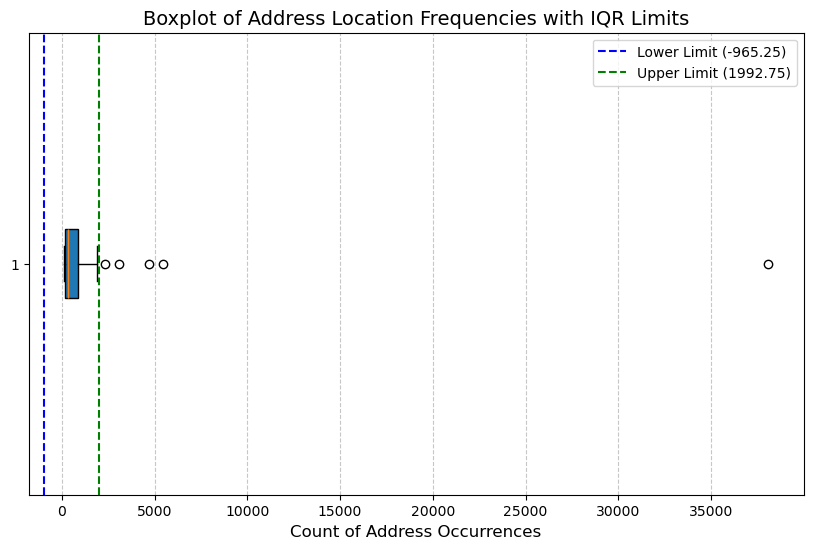

In [130]:
address_counts = address_counts_df['Count']

# Compute Quantiles
Q1 = address_counts.quantile(0.25)  # First quartile (25th percentile)
Q2 = address_counts.quantile(0.50)  # Median (50th percentile)
Q3 = address_counts.quantile(0.75)  # Third quartile (75th percentile)

# Compute IQR
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Display quantiles and limits
print(f"Q1: {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")

# Filter outliers
outliers = ((address_counts < lower_limit) | (address_counts > upper_limit))
print(f"Number of outliers: {sum(outliers)}")

# Plot the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(address_counts, vert=False, patch_artist=True, flierprops=dict(marker='o', color='red'))
plt.title('Boxplot of Address Location Frequencies with IQR Limits', fontsize=14)
plt.xlabel('Count of Address Occurrences', fontsize=12)
plt.axvline(lower_limit, color='blue', linestyle='--', label=f"Lower Limit ({lower_limit:.2f})")
plt.axvline(upper_limit, color='green', linestyle='--', label=f"Upper Limit ({upper_limit:.2f})")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [131]:
address_counts_df[address_counts_df['Count'] >= 100]

,Address,Count
0,Gawalmandi,38095
1,Shahdara,5429
2,Nisbat Road,4686
3,sheikhupura,3094
4,Badami Bagh,2301
5,Lahori Gate,1892
6,"Ravi Road, Lahore",1811
7,Sanda Lahore,1572
8,Gujranwala,1405
9,Bhati Gate,1216


In [132]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude
0,01.05.2011,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381
1,01.05.2011,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290
2,01.05.2011,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260
3,01.05.2011,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381
6,01.05.2011,20,Male,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260
...,...,...,...,...,...,...,...,...,...
83452,31.08.2011,31,Female,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900
83453,31.08.2011,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000
83454,31.08.2011,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260
83456,31.08.2011,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430


In [133]:
df.isna().sum()

Date             0
Age              0
Sex              0
1st complaint    0
2nd Complaint    0
3rd Complaint    0
Address          0
Latitude         0
Longitude        0
dtype: int64

##### Checking 1st complaints outliers based upon its counts

In [134]:
# Get value counts of addresses
Comp1_counts = df['1st complaint'].value_counts()

# Convert the Series to a DataFrame
Comp1_counts_df = Comp1_counts.reset_index()

# Rename the columns for clarity
Comp1_counts_df.columns = ['1st complaint', 'Count']
Comp1_counts_df

,1st complaint,Count
0,fever,14085
1,chills,5036
2,headache,4442
3,vomiting,3745
4,bodyaches,3349
...,...,...
247,Muscle pain,7
248,Arthralgia,5
249,wounds,5
250,redness,5


Q1: 19.0
Q2 (Median): 43.5
Q3: 201.0
IQR: 182.0
Lower Limit: -254.0
Upper Limit: 474.0
Number of outliers: 252


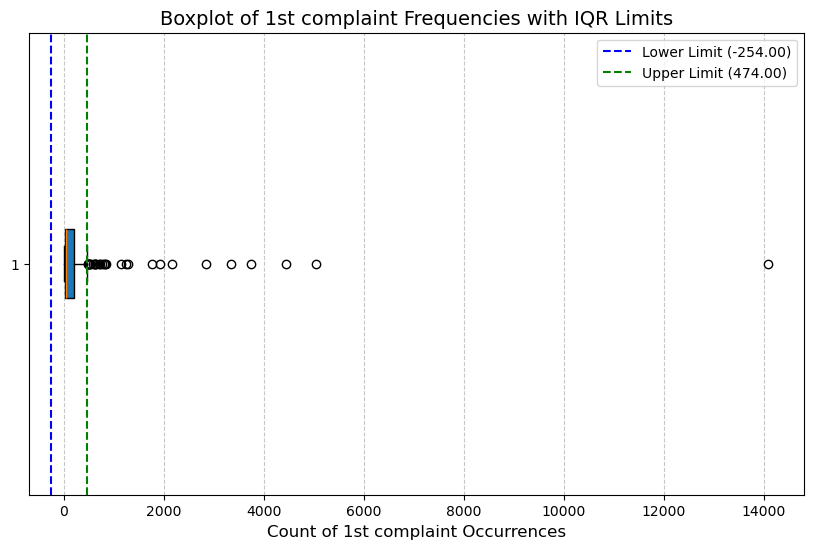

In [135]:
Comp1_counts = Comp1_counts_df['Count']

# Compute Quantiles
Q1 = Comp1_counts.quantile(0.25)  # First quartile (25th percentile)
Q2 = Comp1_counts.quantile(0.50)  # Median (50th percentile)
Q3 = Comp1_counts.quantile(0.75)  # Third quartile (75th percentile)

# Compute IQR
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Display quantiles and limits
print(f"Q1: {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")

# Filter outliers
outliers = ((Comp1_counts < lower_limit) | (Comp1_counts > upper_limit))
print(f"Number of outliers: {len(outliers)}")

# Plot the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(Comp1_counts, vert=False, patch_artist=True, flierprops=dict(marker='o', color='red'))
plt.title('Boxplot of 1st complaint Frequencies with IQR Limits', fontsize=14)
plt.xlabel('Count of 1st complaint Occurrences', fontsize=12)
plt.axvline(lower_limit, color='blue', linestyle='--', label=f"Lower Limit ({lower_limit:.2f})")
plt.axvline(upper_limit, color='green', linestyle='--', label=f"Upper Limit ({upper_limit:.2f})")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### Checking 2nd Complaints outliers based upon its counts

In [136]:
# Get value counts of addresses
Comp2_counts = df['2nd Complaint'].value_counts()

# Convert the Series to a DataFrame
Comp2_counts_df = Comp2_counts.reset_index()

# Rename the columns for clarity
Comp2_counts_df.columns = ['2nd Complaint', 'Count']
Comp2_counts_df

,2nd Complaint,Count
0,fever,12034
1,chills,6433
2,headache,4072
3,vomiting,3526
4,nausea,3470
...,...,...
247,Anorexia,3
248,burning,3
249,Fbeye,2
250,Pain body,1


Q1: 15.0
Q2 (Median): 39.0
Q3: 175.75
IQR: 160.75
Lower Limit: -226.125
Upper Limit: 416.875
Number of outliers: 252


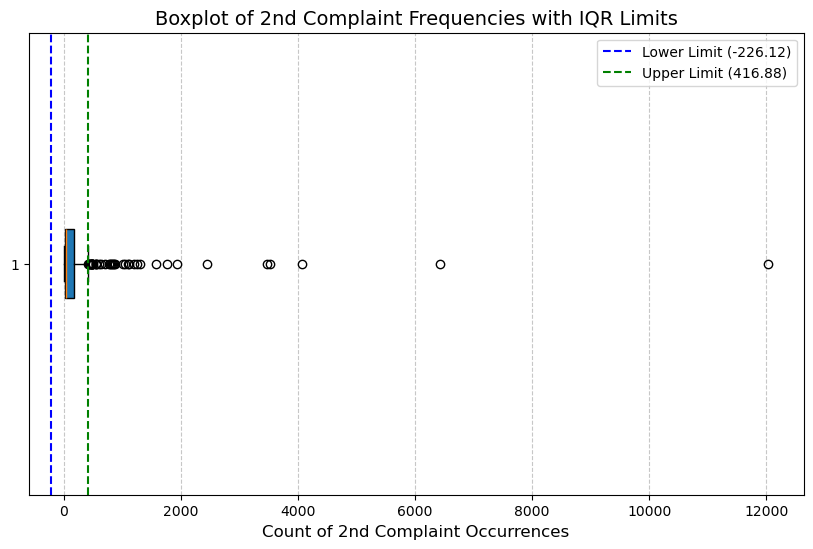

In [137]:
Comp2_counts = Comp2_counts_df['Count']

# Compute Quantiles
Q1 = Comp2_counts.quantile(0.25)  # First quartile (25th percentile)
Q2 = Comp2_counts.quantile(0.50)  # Median (50th percentile)
Q3 = Comp2_counts.quantile(0.75)  # Third quartile (75th percentile)

# Compute IQR
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Display quantiles and limits
print(f"Q1: {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")

# Filter outliers
outliers = ((Comp2_counts < lower_limit) | (Comp2_counts > upper_limit))
print(f"Number of outliers: {len(outliers)}")

# Plot the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(Comp2_counts, vert=False, patch_artist=True, flierprops=dict(marker='o', color='red'))
plt.title('Boxplot of 2nd Complaint Frequencies with IQR Limits', fontsize=14)
plt.xlabel('Count of 2nd Complaint Occurrences', fontsize=12)
plt.axvline(lower_limit, color='blue', linestyle='--', label=f"Lower Limit ({lower_limit:.2f})")
plt.axvline(upper_limit, color='green', linestyle='--', label=f"Upper Limit ({upper_limit:.2f})")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### Checking 3rd Complaints outliers based upon its counts

In [138]:
# Get value counts of addresses
Comp3_counts = df['3rd Complaint'].value_counts()

# Convert the Series to a DataFrame
Comp3_counts_df = Comp3_counts.reset_index()

# Rename the columns for clarity
Comp3_counts_df.columns = ['3rd Complaint', 'Count']
Comp3_counts_df

,3rd Complaint,Count
0,fever,8855
1,chills,6994
2,headache,5863
3,bodyaches,4285
4,nausea,4194
...,...,...
246,blood vomit,2
247,Fb throat,2
248,fracture,2
249,pain ear,1


Q1: 11.0
Q2 (Median): 28.0
Q3: 143.5
IQR: 132.5
Lower Limit: -187.75
Upper Limit: 342.25
Number of outliers: 251


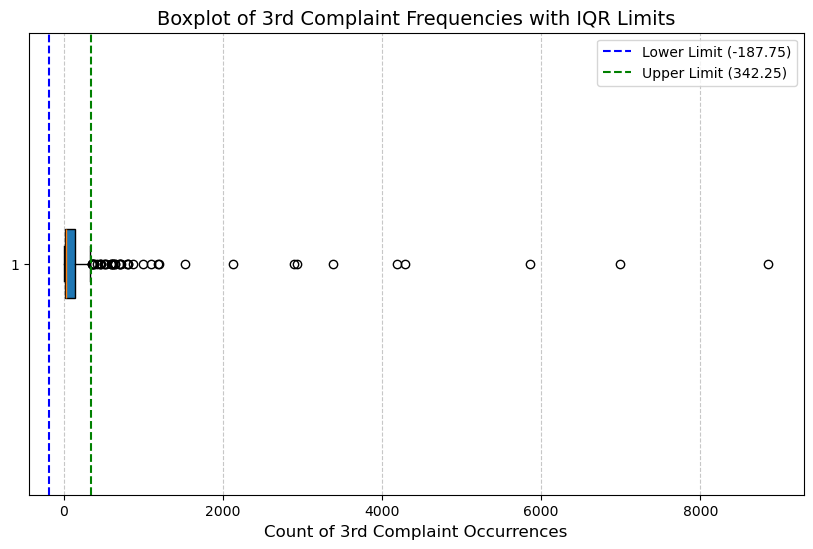

In [139]:
Comp3_counts = Comp3_counts_df['Count']

# Compute Quantiles
Q1 = Comp3_counts.quantile(0.25)  # First quartile (25th percentile)
Q2 = Comp3_counts.quantile(0.50)  # Median (50th percentile)
Q3 = Comp3_counts.quantile(0.75)  # Third quartile (75th percentile)

# Compute IQR
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Display quantiles and limits
print(f"Q1: {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")

# Filter outliers
outliers = ((Comp3_counts < lower_limit) | (Comp3_counts > upper_limit))
print(f"Number of outliers: {len(outliers)}")

# Plot the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(Comp3_counts, vert=False, patch_artist=True, flierprops=dict(marker='o', color='red'))
plt.title('Boxplot of 3rd Complaint Frequencies with IQR Limits', fontsize=14)
plt.xlabel('Count of 3rd Complaint Occurrences', fontsize=12)
plt.axvline(lower_limit, color='blue', linestyle='--', label=f"Lower Limit ({lower_limit:.2f})")
plt.axvline(upper_limit, color='green', linestyle='--', label=f"Upper Limit ({upper_limit:.2f})")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [140]:
df['Sex'].value_counts()

Sex
Male      41569
Female    32723
0             1
Name: count, dtype: int64

In [141]:
df[df['Sex'] == 'Sex']

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude


In [142]:
df[df['Sex'] == '0']

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude
8201,15.05.2011,75,0,headache,fever,chills,"ICCHRA,LAHORE",31.5313,74.3183


In [143]:
# Calculate the mode of the "Sex" column
mode_sex = df[df["Sex"] != '0']["Sex"].mode()[0]

# Replace all occurrences of 0 in the "Sex" column with the mode
df["Sex"] = df["Sex"].replace('0', mode_sex)
df['Sex'].value_counts()

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\3936004974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = df["Sex"].replace('0', mode_sex)


Sex
Male      41570
Female    32723
Name: count, dtype: int64

In [144]:
# Remove rows where 'Sex' column has the value 'Sex'
df = df[df['Sex'] != 'Sex']
df['Sex'].value_counts()

Sex
Male      41570
Female    32723
Name: count, dtype: int64

In [145]:
sex_counts = df['Sex'].value_counts()

##### Sex Distribution

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\2334448088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='pastel')


<Axes: xlabel='Sex'>

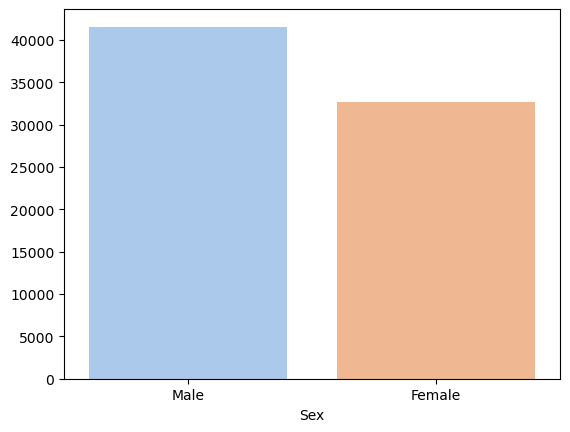

In [146]:
# Create a bar plot using Seaborn
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='pastel')

##### Age Distribution

In [147]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [148]:
df.isna().sum()

Date             0
Age              0
Sex              0
1st complaint    0
2nd Complaint    0
3rd Complaint    0
Address          0
Latitude         0
Longitude        0
dtype: int64

In [149]:
age = df['Age']
age

0        18
1        20
2        40
3        24
6        20
         ..
83452    31
83453    35
83454    35
83456    46
83457    18
Name: Age, Length: 74293, dtype: int64

Q1: 22.0
Q2 (Median): 30.0
Q3: 45.0
IQR: 23.0
Lower Limit: -12.5
Upper Limit: 79.5
Number of outliers: 32


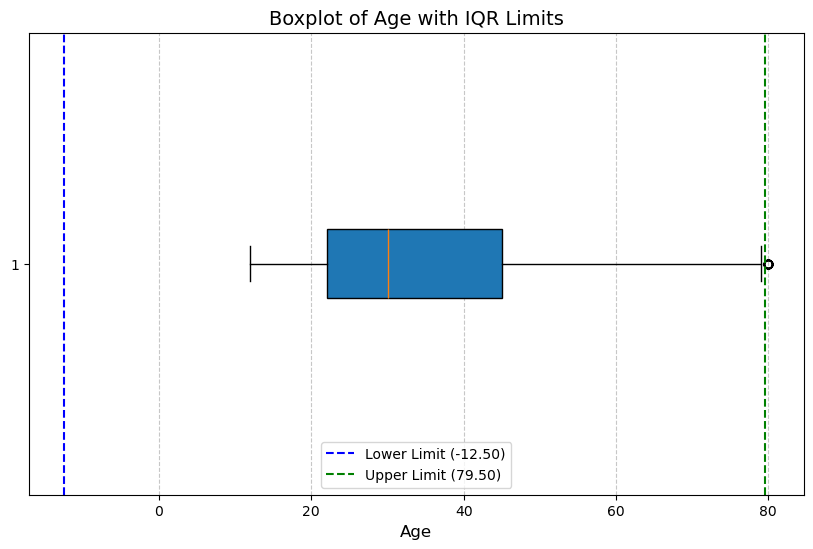

In [150]:
# Compute Quantiles
Q1 = age.quantile(0.25)  # First quartile (25th percentile)
Q2 = age.quantile(0.50)  # Median (50th percentile)
Q3 = age.quantile(0.75)  # Third quartile (75th percentile)

# Compute IQR
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Display quantiles and limits
print(f"Q1: {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")

# Filter outliers
outliers = ((age < lower_limit) | (age > upper_limit))
print(f"Number of outliers: {outliers.sum()}")

# Plot the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(age, vert=False, patch_artist=True, flierprops=dict(marker='o', color='red'))
plt.title('Boxplot of Age with IQR Limits', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.axvline(lower_limit, color='blue', linestyle='--', label=f"Lower Limit ({lower_limit:.2f})")
plt.axvline(upper_limit, color='green', linestyle='--', label=f"Upper Limit ({upper_limit:.2f})")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [151]:
print(f"Minimum Age: {age.min()}")
print(f"Maximum Age: {age.max()}")

Minimum Age: 12
Maximum Age: 80


In [152]:
df['Age'].value_counts()

Age
40    4588
30    4157
50    4152
20    4060
25    3956
      ... 
78      26
71      19
79      15
77      15
69      12
Name: count, Length: 69, dtype: int64

In [153]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(df['Age']) ** (1 / 3))
bin_count = int(np.ceil((df['Age'].max() - df['Age'].min()) / bin_width))
bin_count

63

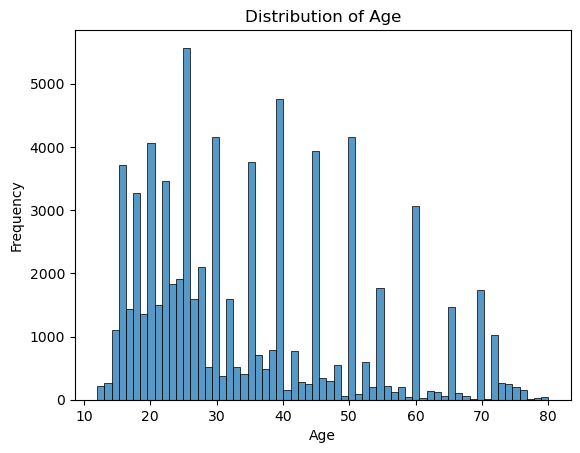

In [154]:
sns.histplot(df['Age'], bins=bin_count)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Disribution of Age and Sex simultaneously with Pivot tables

In [155]:
# Create age bins
age_bins = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=False)
df['Age_Group'] = age_bins

In [156]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,Age_Group
0,01.05.2011,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,"[10, 20)"
1,01.05.2011,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,"[20, 30)"
2,01.05.2011,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,"[40, 50)"
3,01.05.2011,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,"[20, 30)"
6,01.05.2011,20,Male,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,"[20, 30)"
...,...,...,...,...,...,...,...,...,...,...
83452,31.08.2011,31,Female,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,"[30, 40)"
83453,31.08.2011,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,"[30, 40)"
83454,31.08.2011,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,"[30, 40)"
83456,31.08.2011,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,"[40, 50)"


In [157]:
# Create pivot table for age group distribution by sex
pivot_sex_age = df.pivot_table(index="Sex", columns="Age_Group", values="Age", aggfunc="count", fill_value=0)
pivot_sex_age

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\1415527004.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_sex_age = df.pivot_table(index="Sex", columns="Age_Group", values="Age", aggfunc="count", fill_value=0)


Age_Group,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
Sex,,,,,,,,,,
Female,0,6523,9939,5105,4725,2976,2122,1317,16,0
Male,0,4819,12606,7857,6490,4439,2954,2389,16,0


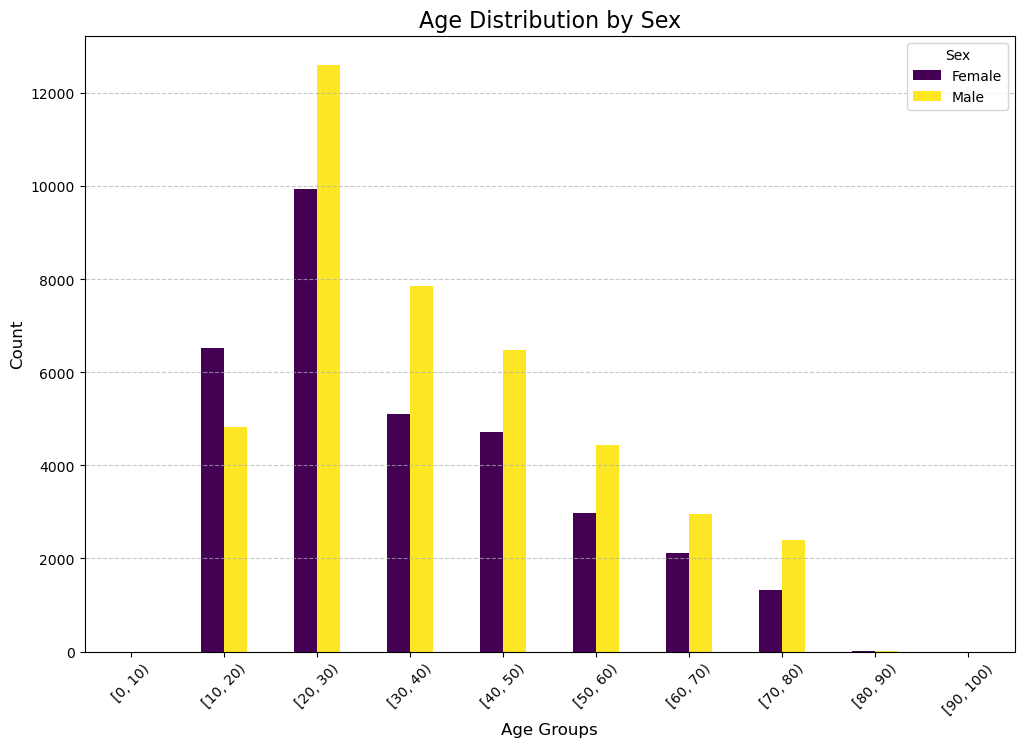

In [158]:
# Plot the pivot table as a side-by-side bar chart
pivot_sex_age.T.plot(kind='bar', figsize=(12, 8), colormap='viridis')

# Add title and labels
plt.title("Age Distribution by Sex", fontsize=16)
plt.xlabel("Age Groups", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add legend and improve its readability
plt.legend(title="Sex", labels=["Female", "Male"], loc="upper right", fontsize=10)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [159]:
 # Melt the complaints data to combine '1st complaint', '2nd Complaint', '3rd Complaint' into one column
dataset_melted = pd.melt(
    df,
    id_vars=["Sex", "Age_Group"],  # Keep Sex and Age_Group as identifiers
    value_vars=["1st complaint", "2nd Complaint", "3rd Complaint"],  # Complaints columns
    var_name="Complaint_Type",  # Name for the new complaint category column
    value_name="Complaint"  # Name for the new complaint description column
)

In [160]:
dataset_melted

,Sex,Age_Group,Complaint_Type,Complaint
0,Male,"[10, 20)",1st complaint,fever
1,Male,"[20, 30)",1st complaint,pain
2,Male,"[40, 50)",1st complaint,Dyspnea
3,Male,"[20, 30)",1st complaint,headache
4,Male,"[20, 30)",1st complaint,pain
...,...,...,...,...
222874,Female,"[30, 40)",3rd Complaint,Body pains
222875,Female,"[30, 40)",3rd Complaint,nausea
222876,Female,"[30, 40)",3rd Complaint,arthralgia
222877,Male,"[40, 50)",3rd Complaint,arthralgia


In [161]:
# Create pivot table: Count complaints by Sex, Age_Group, and Complaint
pivot_complaints = dataset_melted.pivot_table(
    index=["Age_Group", "Complaint"],  # Rows for Age Group and Complaint description
    columns="Sex",  # Columns for Sex (Male/Female)
    values="Complaint_Type",  # Count the occurrences of each complaint
    aggfunc="count",  # Count the number of complaints
    fill_value=0  # Fill missing values with 0
)

# Display the pivot table
pivot_complaints


C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\4034040763.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_complaints = dataset_melted.pivot_table(


Sex                       Female  Male
Age_Group Complaint                   
[0, 10)   Abdomen pain         0     0
          Abdominal pain       0     0
          Abscess              0     0
          Ac.Diarrhoea         0     0
          Ac.Pharyngitis       0     0
...                          ...   ...
[90, 100) vertigo              0     0
          vomiting             0     0
          voniting             0     0
          weakness             0     0
          wounds               0     0

[2560 rows x 2 columns]

In [162]:
# Temporarily display all rows
with pd.option_context('display.max_rows', None):  # Set max_rows to None to show all rows
    print(pivot_complaints)


Sex                                   Female  Male
Age_Group Complaint                               
[0, 10)   Abdomen pain                     0     0
          Abdominal pain                   0     0
          Abscess                          0     0
          Ac.Diarrhoea                     0     0
          Ac.Pharyngitis                   0     0
          Allergy                          0     0
          Anaemia                          0     0
          Anorexia                         0     0
          Anxiety                          0     0
          Appendicitis                     0     0
          Arthralgia                       0     0
          Arthritis                        0     0
          Ascities                         0     0
          Backache                         0     0
          Bells palsy                      0     0
          Body pains                       0     0
          Bodyaches                        0     0
          Bronchial asthma     

In [163]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,Age_Group
0,01.05.2011,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,"[10, 20)"
1,01.05.2011,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,"[20, 30)"
2,01.05.2011,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,"[40, 50)"
3,01.05.2011,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,"[20, 30)"
6,01.05.2011,20,Male,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,"[20, 30)"
...,...,...,...,...,...,...,...,...,...,...
83452,31.08.2011,31,Female,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,"[30, 40)"
83453,31.08.2011,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,"[30, 40)"
83454,31.08.2011,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,"[30, 40)"
83456,31.08.2011,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,"[40, 50)"


#### Hotspots creation using latitudes and longitudes

##### Converting Date column into Date time format

In [164]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [165]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,Age_Group
0,2011-05-01,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,"[10, 20)"
1,2011-05-01,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,"[20, 30)"
2,2011-05-01,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,"[40, 50)"
3,2011-05-01,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,"[20, 30)"
6,2011-05-01,20,Male,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,"[20, 30)"
...,...,...,...,...,...,...,...,...,...,...
83452,2011-08-31,31,Female,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,"[30, 40)"
83453,2011-08-31,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,"[30, 40)"
83454,2011-08-31,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,"[30, 40)"
83456,2011-08-31,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,"[40, 50)"


##### Grouping data by Date, Address, Latitude, and Longitude 

In [166]:
from tqdm import tqdm

# Enable tqdm for pandas
tqdm.pandas()

# Group data by Date, Address, Latitude, and Longitude
grouped = (
    df.groupby(["Date", "Address", "Latitude", "Longitude"])
    .progress_apply(
        lambda group: pd.Series({
            "total_males": (group["Sex"] == "Male").sum(),  # Count of males
            "total_females": (group["Sex"] == "Female").sum(),  # Count of females
            "major_1st_complaint": group["1st complaint"].mode()[0] if not group["1st complaint"].mode().empty else None,  # Most common 1st complaint
            "major_2nd_complaint": group["2nd Complaint"].mode()[0] if not group["2nd Complaint"].mode().empty else None,  # Most common 2nd complaint
            "major_3rd_complaint": group["3rd Complaint"].mode()[0] if not group["3rd Complaint"].mode().empty else None,  # Most common 3rd complaint
            "age_group_males": group[group["Sex"] == "Male"]["Age_Group"].mode()[0] if not group[group["Sex"] == "Male"]["Age_Group"].mode().empty else None,  # Most common age group for males
            "age_group_females": group[group["Sex"] == "Female"]["Age_Group"].mode()[0] if not group[group["Sex"] == "Female"]["Age_Group"].mode().empty else None,  # Most common age group for females
        })
    )
    .reset_index()  # Reset index to make the DataFrame tabular
)

100%|██████████████████████████████████████████████████████████████████████████████| 4587/4587 [00:50<00:00, 90.04it/s]


In [167]:
grouped

,Date,Address,Latitude,Longitude,total_males,total_females,major_1st_complaint,major_2nd_complaint,major_3rd_complaint,age_group_males,age_group_females
0,2011-05-01,Anarkali Bazaar Lahore,31.569800,74.312000,4,4,abdominal pain,body pain,fever,"[30.0, 40.0)","[10.0, 20.0)"
1,2011-05-01,Badami Bagh,31.601849,74.320621,14,10,chills,headache,fever,"[20.0, 30.0)","[20.0, 30.0)"
2,2011-05-01,Baghbanpura,31.584991,74.374875,1,0,Loose motions,Fever,Abdomen pain,"[20.0, 30.0)",NaN
3,2011-05-01,Band Rd Lahore,31.536960,74.271942,4,5,chills,bodyaches,fever,"[10.0, 20.0)","[20.0, 30.0)"
4,2011-05-01,Bhati Gate,31.580200,74.307300,8,6,chills,fever,fever,"[20.0, 30.0)","[30.0, 40.0)"
...,...,...,...,...,...,...,...,...,...,...,...
4582,2011-08-31,Shah Alami,31.577700,74.320500,2,0,Abscess,Fever,SOB,"[20.0, 30.0)",NaN
4583,2011-08-31,Shahdara,31.632120,74.298630,24,33,Fever,headache,headache,"[20.0, 30.0)","[10.0, 20.0)"
4584,2011-08-31,Sialkot,32.494499,74.522892,5,4,Fever,Chills,fever,"[30.0, 40.0)","[20.0, 30.0)"
4585,2011-08-31,URDU BAZAR LHR,31.576100,74.309100,0,2,chills,anxiety,bleeding,NaN,"[10.0, 20.0)"


In [168]:
# Temporarily display all rows
with pd.option_context('display.max_rows', None):  # Set max_rows to None to show all rows
    print(grouped)

           Date                    Address   Latitude  Longitude  total_males  \
0    2011-05-01     Anarkali Bazaar Lahore  31.569800  74.312000            4   
1    2011-05-01                Badami Bagh  31.601849  74.320621           14   
2    2011-05-01                Baghbanpura  31.584991  74.374875            1   
3    2011-05-01             Band Rd Lahore  31.536960  74.271942            4   
4    2011-05-01                 Bhati Gate  31.580200  74.307300            8   
5    2011-05-01          Bilal Ganj Lahore  31.582000  74.300800            7   
6    2011-05-01             CHAH MEERA LHR  31.587902  74.342600            1   
7    2011-05-01              FAIZ BAGH LHR  31.582586  74.338977            1   
8    2011-05-01                 Gawalmandi  31.571870  74.318260          167   
9    2011-05-01                 Gujranwala  32.166351  74.195900            5   
10   2011-05-01             Gulshan-e-Ravi  31.552170  74.275290            6   
11   2011-05-01             

##### Creating a pivot table from the grouped data

In [169]:
# Create a pivot table from the grouped data
pivot_table = pd.pivot_table(
    grouped,
    index=["Date", "Address", "Latitude", "Longitude"],  # Row indices
    values=[
        "total_males",
        "total_females",
        "major_1st_complaint",
        "major_2nd_complaint",
        "major_3rd_complaint",
        "age_group_males",
        "age_group_females",
    ],
    aggfunc="first",  # Ensure no aggregation conflict
)

In [170]:
pivot_table

age_group_females  \
Date       Address                Latitude  Longitude                     
2011-05-01 Anarkali Bazaar Lahore 31.569800 74.312000      [10.0, 20.0)   
           Badami Bagh            31.601849 74.320621      [20.0, 30.0)   
           Baghbanpura            31.584991 74.374875               NaN   
           Band Rd Lahore         31.536960 74.271942      [20.0, 30.0)   
           Bhati Gate             31.580200 74.307300      [30.0, 40.0)   
...                                                                 ...   
2011-08-31 Shah Alami             31.577700 74.320500               NaN   
           Shahdara               31.632120 74.298630      [10.0, 20.0)   
           Sialkot                32.494499 74.522892      [20.0, 30.0)   
           URDU BAZAR LHR         31.576100 74.309100      [10.0, 20.0)   
           sheikhupura            31.716661 73.985023      [20.0, 30.0)   

                                                      age_group_males  \
Date       Address                Latitude  Longitude                   
2011-05-01 Anarkali Bazaar Lahore 31.569800 74.312000    [30.0, 40.0)   
           Badami Bagh            31.601849 74.320621    [20.0, 30.0)   
           Baghbanpura            31.584991 74.374875    [20.0, 30.0)   
           Band Rd Lahore         31.536960 74.271942    [10.0, 20.0)   
           Bhati Gate             31.580200 74.307300    [20.0, 30.0)   
...                                                               ...   
2011-08-31 Shah Alami             31.577700 74.320500    [20.0, 30.0)   
           Shahdara               31.632120 74.298630    [20.0, 30.0)   
           Sialkot                32.494499 74.522892    [30.0, 40.0)   
           URDU BAZAR LHR         31.576100 74.309100             NaN   
           sheikhupura            31.716661 73.985023    [30.0, 40.0)   

                                                      major_1st_complaint  \
Date       Address                Latitude  Longitude                       
2011-05-01 Anarkali Bazaar Lahore 31.569800 74.312000      abdominal pain   
           Badami Bagh            31.601849 74.320621              chills   
           Baghbanpura            31.584991 74.374875       Loose motions   
           Band Rd Lahore         31.536960 74.271942              chills   
           Bhati Gate             31.580200 74.307300              chills   
...                                                                   ...   
2011-08-31 Shah Alami             31.577700 74.320500             Abscess   
           Shahdara               31.632120 74.298630               Fever   
           Sialkot                32.494499 74.522892               Fever   
           URDU BAZAR LHR         31.576100 74.309100              chills   
           sheikhupura            31.716661 73.985023               fever   

                                                      major_2nd_complaint  \
Date       Address                Latitude  Longitude                       
2011-05-01 Anarkali Bazaar Lahore 31.569800 74.312000           body pain   
           Badami Bagh            31.601849 74.320621            headache   
           Baghbanpura            31.584991 74.374875               Fever   
           Band Rd Lahore         31.536960 74.271942           bodyaches   
           Bhati Gate             31.580200 74.307300               fever   
...                                                                   ...   
2011-08-31 Shah Alami             31.577700 74.320500               Fever   
           Shahdara               31.632120 74.298630            headache   
           Sialkot                32.494499 74.522892              Chills   
           URDU BAZAR LHR         31.576100 74.309100             anxiety   
           sheikhupura            31.716661 73.985023              Chills   

                                                      major_3rd_complaint  \
Date       Address                Latitude  Lon

##### Hostspots using SVM over folium map

In [171]:
# Aggregate total patients by Latitude and Longitude
pivot_table["total_patients"] = pivot_table["total_males"] + pivot_table["total_females"]
location_data = pivot_table.groupby(["Latitude", "Longitude"])["total_patients"].sum().reset_index()

In [172]:
pivot_table

age_group_females  \
Date       Address                Latitude  Longitude                     
2011-05-01 Anarkali Bazaar Lahore 31.569800 74.312000      [10.0, 20.0)   
           Badami Bagh            31.601849 74.320621      [20.0, 30.0)   
           Baghbanpura            31.584991 74.374875               NaN   
           Band Rd Lahore         31.536960 74.271942      [20.0, 30.0)   
           Bhati Gate             31.580200 74.307300      [30.0, 40.0)   
...                                                                 ...   
2011-08-31 Shah Alami             31.577700 74.320500               NaN   
           Shahdara               31.632120 74.298630      [10.0, 20.0)   
           Sialkot                32.494499 74.522892      [20.0, 30.0)   
           URDU BAZAR LHR         31.576100 74.309100      [10.0, 20.0)   
           sheikhupura            31.716661 73.985023      [20.0, 30.0)   

                                                      age_group_males  \
Date       Address                Latitude  Longitude                   
2011-05-01 Anarkali Bazaar Lahore 31.569800 74.312000    [30.0, 40.0)   
           Badami Bagh            31.601849 74.320621    [20.0, 30.0)   
           Baghbanpura            31.584991 74.374875    [20.0, 30.0)   
           Band Rd Lahore         31.536960 74.271942    [10.0, 20.0)   
           Bhati Gate             31.580200 74.307300    [20.0, 30.0)   
...                                                               ...   
2011-08-31 Shah Alami             31.577700 74.320500    [20.0, 30.0)   
           Shahdara               31.632120 74.298630    [20.0, 30.0)   
           Sialkot                32.494499 74.522892    [30.0, 40.0)   
           URDU BAZAR LHR         31.576100 74.309100             NaN   
           sheikhupura            31.716661 73.985023    [30.0, 40.0)   

                                                      major_1st_complaint  \
Date       Address                Latitude  Longitude                       
2011-05-01 Anarkali Bazaar Lahore 31.569800 74.312000      abdominal pain   
           Badami Bagh            31.601849 74.320621              chills   
           Baghbanpura            31.584991 74.374875       Loose motions   
           Band Rd Lahore         31.536960 74.271942              chills   
           Bhati Gate             31.580200 74.307300              chills   
...                                                                   ...   
2011-08-31 Shah Alami             31.577700 74.320500             Abscess   
           Shahdara               31.632120 74.298630               Fever   
           Sialkot                32.494499 74.522892               Fever   
           URDU BAZAR LHR         31.576100 74.309100              chills   
           sheikhupura            31.716661 73.985023               fever   

                                                      major_2nd_complaint  \
Date       Address                Latitude  Longitude                       
2011-05-01 Anarkali Bazaar Lahore 31.569800 74.312000           body pain   
           Badami Bagh            31.601849 74.320621            headache   
           Baghbanpura            31.584991 74.374875               Fever   
           Band Rd Lahore         31.536960 74.271942           bodyaches   
           Bhati Gate             31.580200 74.307300               fever   
...                                                                   ...   
2011-08-31 Shah Alami             31.577700 74.320500               Fever   
           Shahdara               31.632120 74.298630            headache   
           Sialkot                32.494499 74.522892              Chills   
           URDU BAZAR LHR         31.576100 74.309100             anxiety   
           sheikhupura            31.716661 73.985023              Chills   

                                                      major_3rd_complaint  \
Date       Address                Latitude  Lon

In [173]:
# Summarize the grouped data by Address
regional_summary = grouped.groupby("Address").agg({
    "total_males": "sum",
    "total_females": "sum",
    "major_1st_complaint": lambda x: x.mode()[0] if not x.mode().empty else None,
    "major_2nd_complaint": lambda x: x.mode()[0] if not x.mode().empty else None,
    "major_3rd_complaint": lambda x: x.mode()[0] if not x.mode().empty else None,
}).reset_index()

In [174]:
regional_summary

,Address,total_males,total_females,major_1st_complaint,major_2nd_complaint,major_3rd_complaint
0,Anarkali Bazaar Lahore,471,353,fever,fever,fever
1,Badami Bagh,1259,1042,fever,fever,fever
2,Baghbanpura,209,156,fever,fever,chills
3,Band Rd Lahore,386,333,fever,fever,fever
4,Begum Kot Shahdara Town,114,108,fever,chills,chills
5,Bhati Gate,663,553,fever,fever,fever
6,Bilal Ganj Lahore,291,243,fever,fever,fever
7,CHAH MEERA LHR,54,59,fever,fever,fever
8,FAIZ BAGH LHR,61,47,fever,fever,chills
9,GHARI SHAHU LHR,78,45,fever,chills,Bodyaches


In [175]:
# Visualize the top 10 regions with the highest total patients
regional_summary["total_patients"] = regional_summary["total_males"] + regional_summary["total_females"]
top_regions = regional_summary.nlargest(10, "total_patients")

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\312378371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x="total_patients", y="Address", palette="viridis")


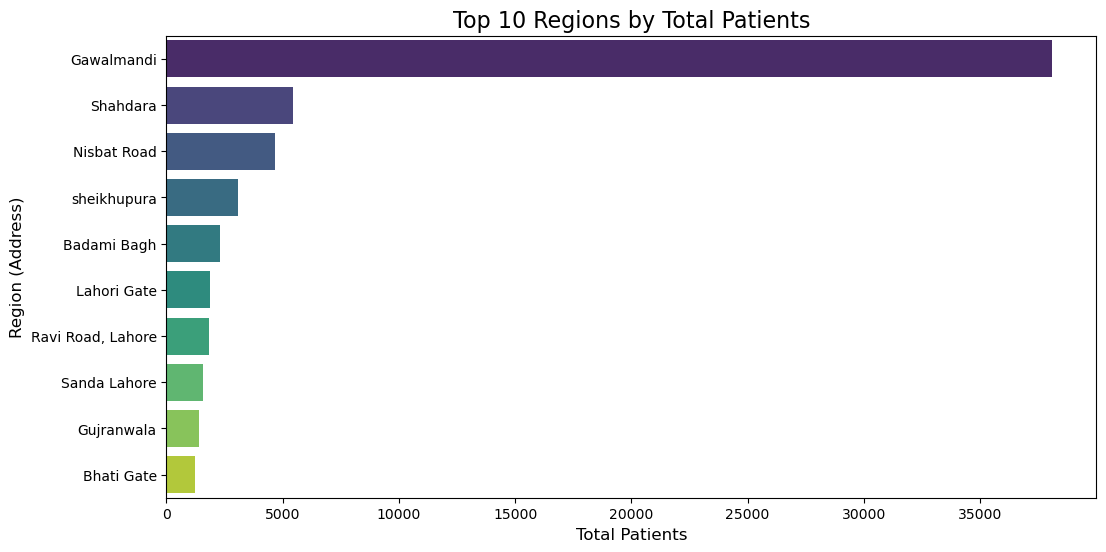

In [176]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_regions, x="total_patients", y="Address", palette="viridis")
plt.title("Top 10 Regions by Total Patients", fontsize=16)
plt.xlabel("Total Patients", fontsize=12)
plt.ylabel("Region (Address)", fontsize=12)
plt.show()


In [177]:
# Visualize the top 10 regions with the highest total males
top_regions = regional_summary.nlargest(10, "total_females")

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\257671731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x="total_females", y="Address", palette="viridis")


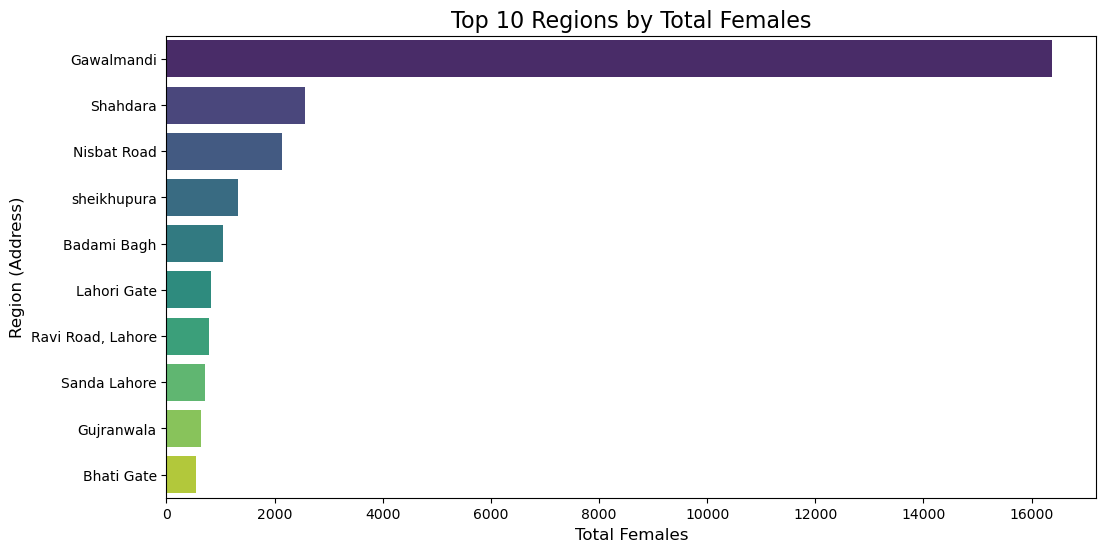

In [178]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_regions, x="total_females", y="Address", palette="viridis")
plt.title("Top 10 Regions by Total Females", fontsize=16)
plt.xlabel("Total Females", fontsize=12)
plt.ylabel("Region (Address)", fontsize=12)
plt.show()

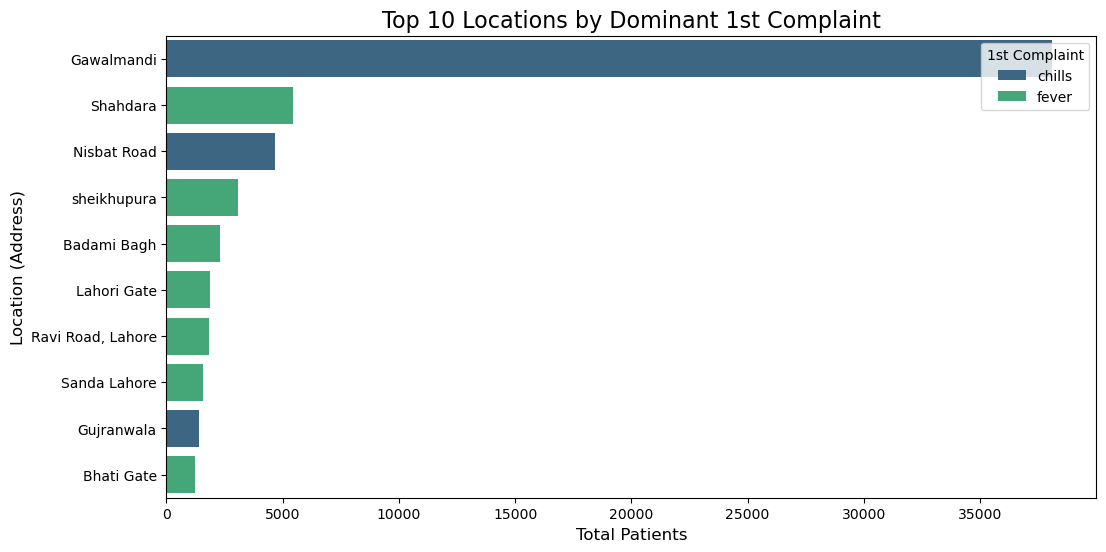

In [179]:
# Bar Plot for 1st Complaints
plt.figure(figsize=(12, 6))
sns.barplot(data=top_regions, x="total_patients", y="Address", hue="major_3rd_complaint", palette="viridis")
plt.title("Top 10 Locations by Dominant 1st Complaint", fontsize=16)
plt.xlabel("Total Patients", fontsize=12)
plt.ylabel("Location (Address)", fontsize=12)
plt.legend(title="1st Complaint", loc="upper right")
plt.show()

In [180]:
# Analyze dominant complaints by Age_Group
age_complaint_summary = grouped.groupby(["age_group_females", "major_3rd_complaint"]).size().reset_index(name="count")
age_complaint_summary = age_complaint_summary.nlargest(10, "count")

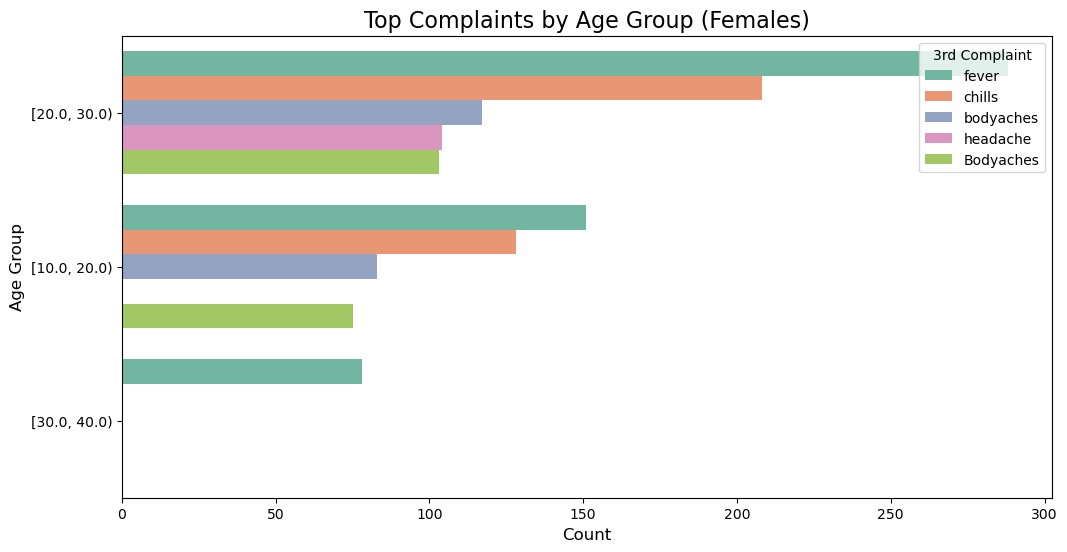

In [181]:
plt.figure(figsize=(12, 6))
sns.barplot(data=age_complaint_summary, x="count", y="age_group_females", hue="major_3rd_complaint", palette="Set2")
plt.title("Top Complaints by Age Group (Females)", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.legend(title="3rd Complaint", loc="upper right")
plt.show()

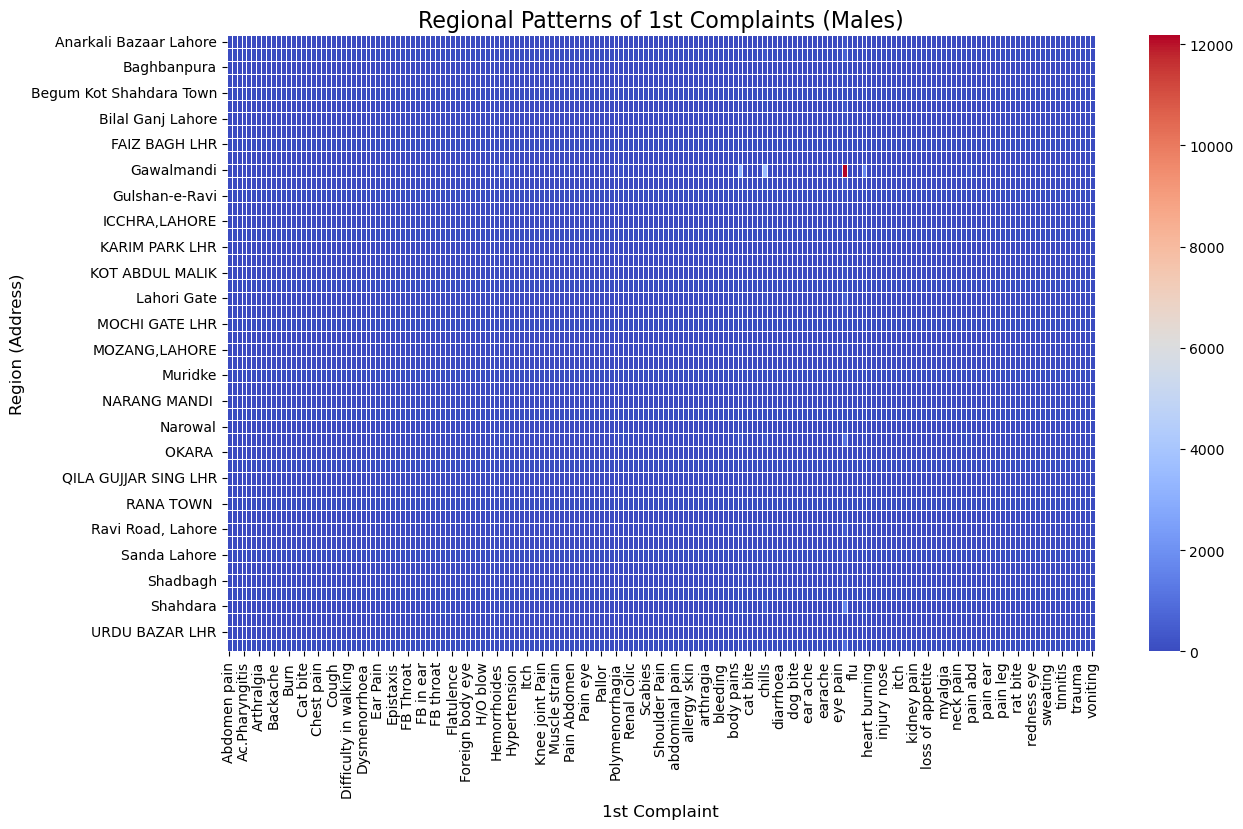

In [182]:
# Heatmap for regional complaint patterns
heatmap_data = grouped.pivot_table(
    index="Address",
    columns="major_1st_complaint",
    values="total_males",
    aggfunc="sum",
    fill_value=0
)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, linewidths=.5)
plt.title("Regional Patterns of 1st Complaints (Males)", fontsize=16)
plt.xlabel("1st Complaint", fontsize=12)
plt.ylabel("Region (Address)", fontsize=12)
plt.show()

In [183]:
location_data

,Latitude,Longitude,total_patients
0,30.813802,73.453378,195
1,31.449151,73.712479,104
2,31.460495,74.221700,114
3,31.531300,74.318300,309
4,31.536960,74.271942,719
5,31.549700,74.343600,1811
6,31.552170,74.275290,539
7,31.552830,74.295688,119
8,31.559700,74.313800,924
9,31.559850,74.336900,123


In [184]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the patient counts
scaler = MinMaxScaler()
location_data["normalized_patients"] = scaler.fit_transform(location_data[["total_patients"]])

# Display the data with normalized values
location_data


,Latitude,Longitude,total_patients,normalized_patients
0,30.813802,73.453378,195,0.002395
1,31.449151,73.712479,104,0.000000
2,31.460495,74.221700,114,0.000263
3,31.531300,74.318300,309,0.005396
4,31.536960,74.271942,719,0.016188
5,31.549700,74.343600,1811,0.044932
6,31.552170,74.275290,539,0.011450
7,31.552830,74.295688,119,0.000395
8,31.559700,74.313800,924,0.021584
9,31.559850,74.336900,123,0.000500


##### SVM using RBF

In [185]:
from sklearn.svm import SVR

# Features (latitude and longitude) and target (normalized patients)
X = location_data[["Latitude", "Longitude"]]
y = location_data["normalized_patients"]

# Train the SVM model
svm_model = SVR(kernel="rbf", C=1, gamma=1000000)  # Radial Basis Function kernel
svm_model.fit(X, y)

# Predict patient intensity using the trained SVM model
location_data["svm_intensity"] = svm_model.predict(X)

# Display data with SVM predictions
location_data


,Latitude,Longitude,total_patients,normalized_patients,svm_intensity
0,30.813802,73.453378,195,0.002395,0.102425
1,31.449151,73.712479,104,0.000000,0.099725
2,31.460495,74.221700,114,0.000263,0.100270
3,31.531300,74.318300,309,0.005396,0.105265
4,31.536960,74.271942,719,0.016188,0.116228
5,31.549700,74.343600,1811,0.044932,0.126548
6,31.552170,74.275290,539,0.011450,0.111786
7,31.552830,74.295688,119,0.000395,0.100402
8,31.559700,74.313800,924,0.021584,0.121920
9,31.559850,74.336900,123,0.000500,0.100369


In [186]:
import folium
from folium.plugins import HeatMap

# Create a base map centered on the mean location
map_center = [location_data["Latitude"].mean(), location_data["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add a heat map layer using SVM-predicted intensity
heat_data = [
    [row["Latitude"], row["Longitude"], row["svm_intensity"]]
    for index, row in location_data.iterrows()
]

HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)

# Save the map to an HTML file and display
m.save("hotspot_map.html")
m


#### Time Series Analysis using STL

In [187]:
# Compute total patients per date
grouped["total_patients"] = grouped["total_males"] + grouped["total_females"]
time_series = grouped.groupby("Date")["total_patients"].sum().reset_index()

# Ensure the date column is in datetime format
time_series["Date"] = pd.to_datetime(time_series["Date"])

# Set the date as the index
time_series.set_index("Date", inplace=True)

In [188]:
time_series

,total_patients
Date,
2011-05-01,560
2011-05-02,705
2011-05-03,551
2011-05-04,589
2011-05-05,633
...,...
2011-08-27,764
2011-08-28,2424
2011-08-29,420


##### Checking if time series is stationary or not by accepting Null hypothesis or rejecting it

In [189]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(time_series)
# Print p-value
print(result[1])
if result[1]<0.05:
    print('Time Series is stationary')
    
else:
    print('There is a need to make this Time Series stationary')

0.0011559415207671273
Time Series is stationary


In [190]:
from statsmodels.tsa.seasonal import STL
# Perform STL decomposition
stl = STL(time_series["total_patients"], period=7)  # Assuming weekly periodicity
result = stl.fit()

seasonal, trend, resid= result.seasonal, result.trend, result.resid


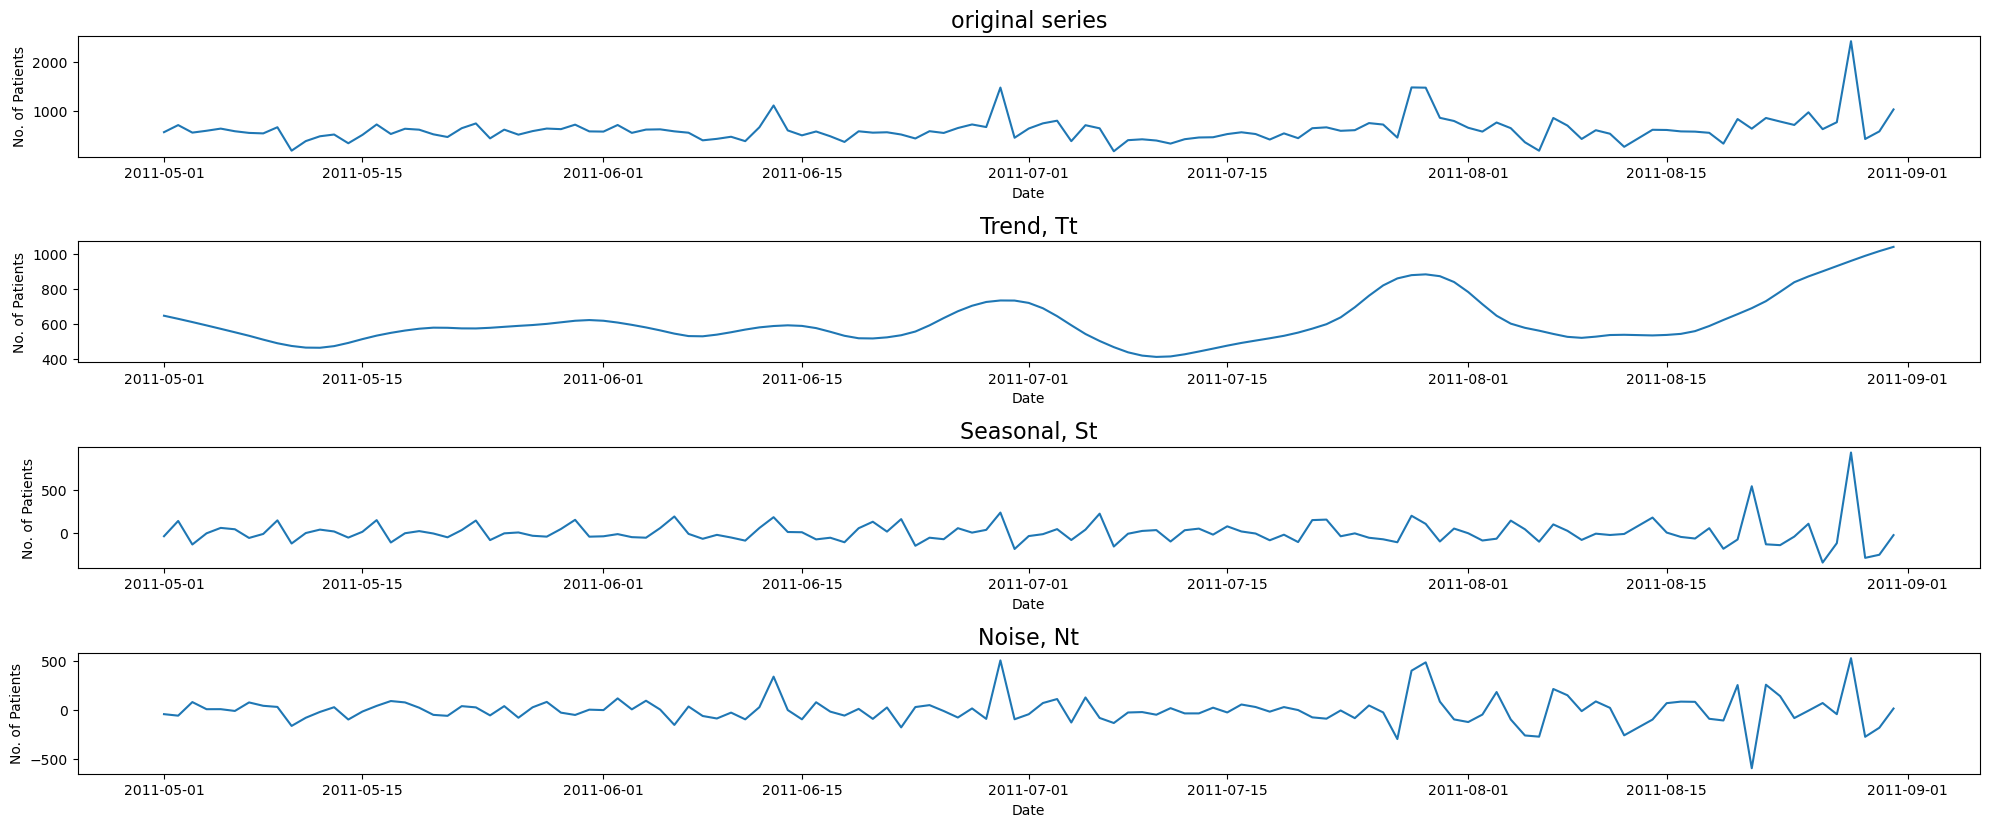

In [191]:
plt.figure(figsize = (20,10))

plt.subplot(5,1,1)
plt.plot(time_series)
plt.title('original series', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.subplot(5,1,2)
plt.plot(trend)
plt.title('Trend, Tt', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.subplot(5,1,3)
plt.plot(seasonal)
plt.title('Seasonal, St', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.subplot(5,1,4)
plt.plot(resid)
plt.title('Noise, Nt', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.tight_layout()

Text(0, 0.5, 'No. of Patients')

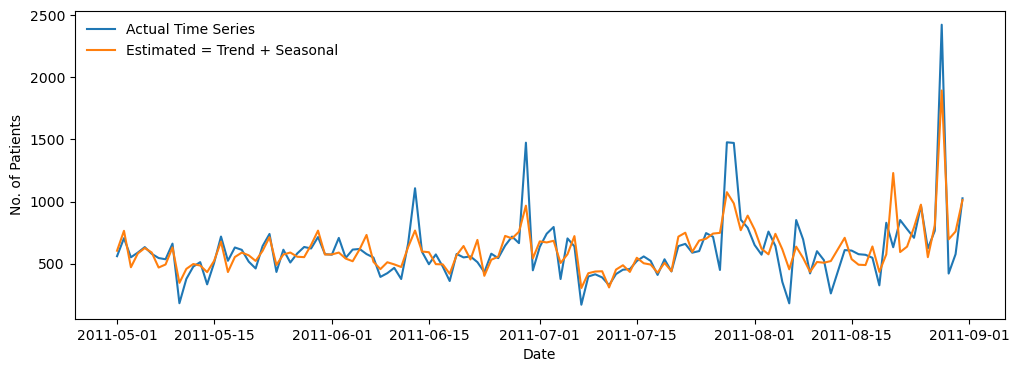

In [192]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
plt.plot(time_series, label = 'Actual Time Series')
plt.plot(estimated, label = 'Estimated = Trend + Seasonal')
plt.legend(frameon=False)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

#blue is original while orange is estimated

In [193]:
# Calculate Q1, Q3, and IQR
Q1 = time_series["total_patients"].quantile(0.25)
Q3 = time_series["total_patients"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")


Q1: 476.0, Q3: 660.5, IQR: 184.5
Lower Limit: 199.25, Upper Limit: 937.25


In [194]:
# Identify anomalies
time_series["is_anomaly"] = (time_series["total_patients"] < lower_limit) | (time_series["total_patients"] > upper_limit)

# Mark anomalies
anomalies = time_series[time_series["is_anomaly"]]
print(f"Anomalies:\n{anomalies}")


Anomalies:
            total_patients  is_anomaly
Date                                  
2011-05-10             181        True
2011-06-13            1107        True
2011-06-29            1474        True
2011-07-07             169        True
2011-07-28            1477        True
2011-07-29            1472        True
2011-08-06             180        True
2011-08-25             967        True
2011-08-28            2424        True
2011-08-31            1026        True


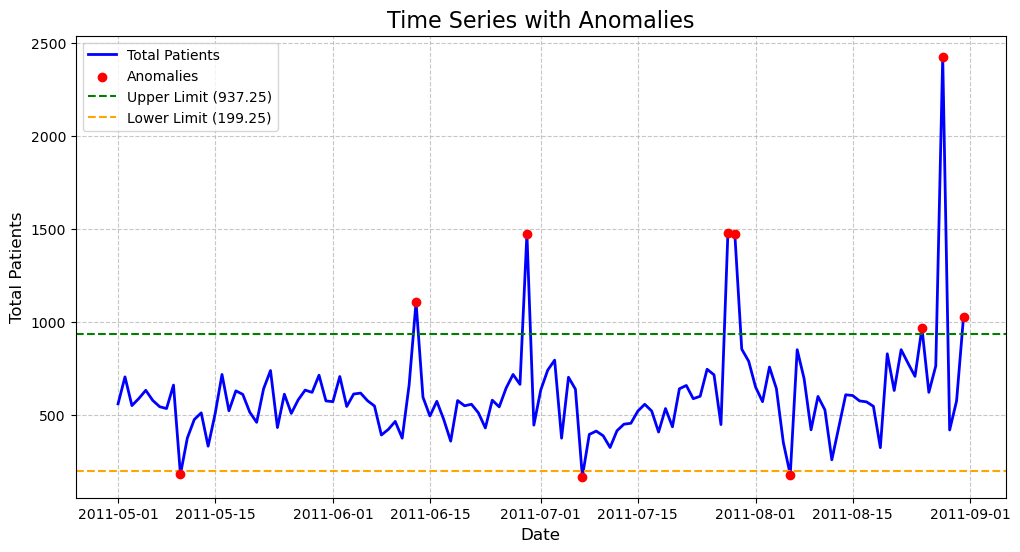

In [195]:
plt.figure(figsize=(12, 6))

# Plot the time series
plt.plot(time_series.index, time_series["total_patients"], label="Total Patients", color="blue", linewidth=2)

# Highlight anomalies
plt.scatter(anomalies.index, anomalies["total_patients"], color="red", label="Anomalies", zorder=5)

# Add limits to the plot
plt.axhline(upper_limit, color="green", linestyle="--", label=f"Upper Limit ({upper_limit:.2f})")
plt.axhline(lower_limit, color="orange", linestyle="--", label=f"Lower Limit ({lower_limit:.2f})")

# Customize the plot
plt.title("Time Series with Anomalies", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Patients", fontsize=12)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()


##### TIme Series for Males

In [196]:
grouped

,Date,Address,Latitude,Longitude,total_males,total_females,major_1st_complaint,major_2nd_complaint,major_3rd_complaint,age_group_males,age_group_females,total_patients
0,2011-05-01,Anarkali Bazaar Lahore,31.569800,74.312000,4,4,abdominal pain,body pain,fever,"[30.0, 40.0)","[10.0, 20.0)",8
1,2011-05-01,Badami Bagh,31.601849,74.320621,14,10,chills,headache,fever,"[20.0, 30.0)","[20.0, 30.0)",24
2,2011-05-01,Baghbanpura,31.584991,74.374875,1,0,Loose motions,Fever,Abdomen pain,"[20.0, 30.0)",NaN,1
3,2011-05-01,Band Rd Lahore,31.536960,74.271942,4,5,chills,bodyaches,fever,"[10.0, 20.0)","[20.0, 30.0)",9
4,2011-05-01,Bhati Gate,31.580200,74.307300,8,6,chills,fever,fever,"[20.0, 30.0)","[30.0, 40.0)",14
...,...,...,...,...,...,...,...,...,...,...,...,...
4582,2011-08-31,Shah Alami,31.577700,74.320500,2,0,Abscess,Fever,SOB,"[20.0, 30.0)",NaN,2
4583,2011-08-31,Shahdara,31.632120,74.298630,24,33,Fever,headache,headache,"[20.0, 30.0)","[10.0, 20.0)",57
4584,2011-08-31,Sialkot,32.494499,74.522892,5,4,Fever,Chills,fever,"[30.0, 40.0)","[20.0, 30.0)",9
4585,2011-08-31,URDU BAZAR LHR,31.576100,74.309100,0,2,chills,anxiety,bleeding,NaN,"[10.0, 20.0)",2


In [197]:
# Compute total male per date
time_series_male = grouped.groupby("Date")["total_males"].sum().reset_index()

# Ensure the date column is in datetime format
time_series_male["Date"] = pd.to_datetime(time_series_male["Date"])

# Set the date as the index
time_series_male.set_index("Date", inplace=True)

In [198]:
time_series_male

,total_males
Date,
2011-05-01,340
2011-05-02,428
2011-05-03,354
2011-05-04,367
2011-05-05,405
...,...
2011-08-27,345
2011-08-28,1155
2011-08-29,180


In [199]:
# Perform STL decomposition
stl = STL(time_series_male["total_males"], period=7)  # Assuming weekly periodicity
result = stl.fit()

seasonal, trend, resid= result.seasonal, result.trend, result.resid


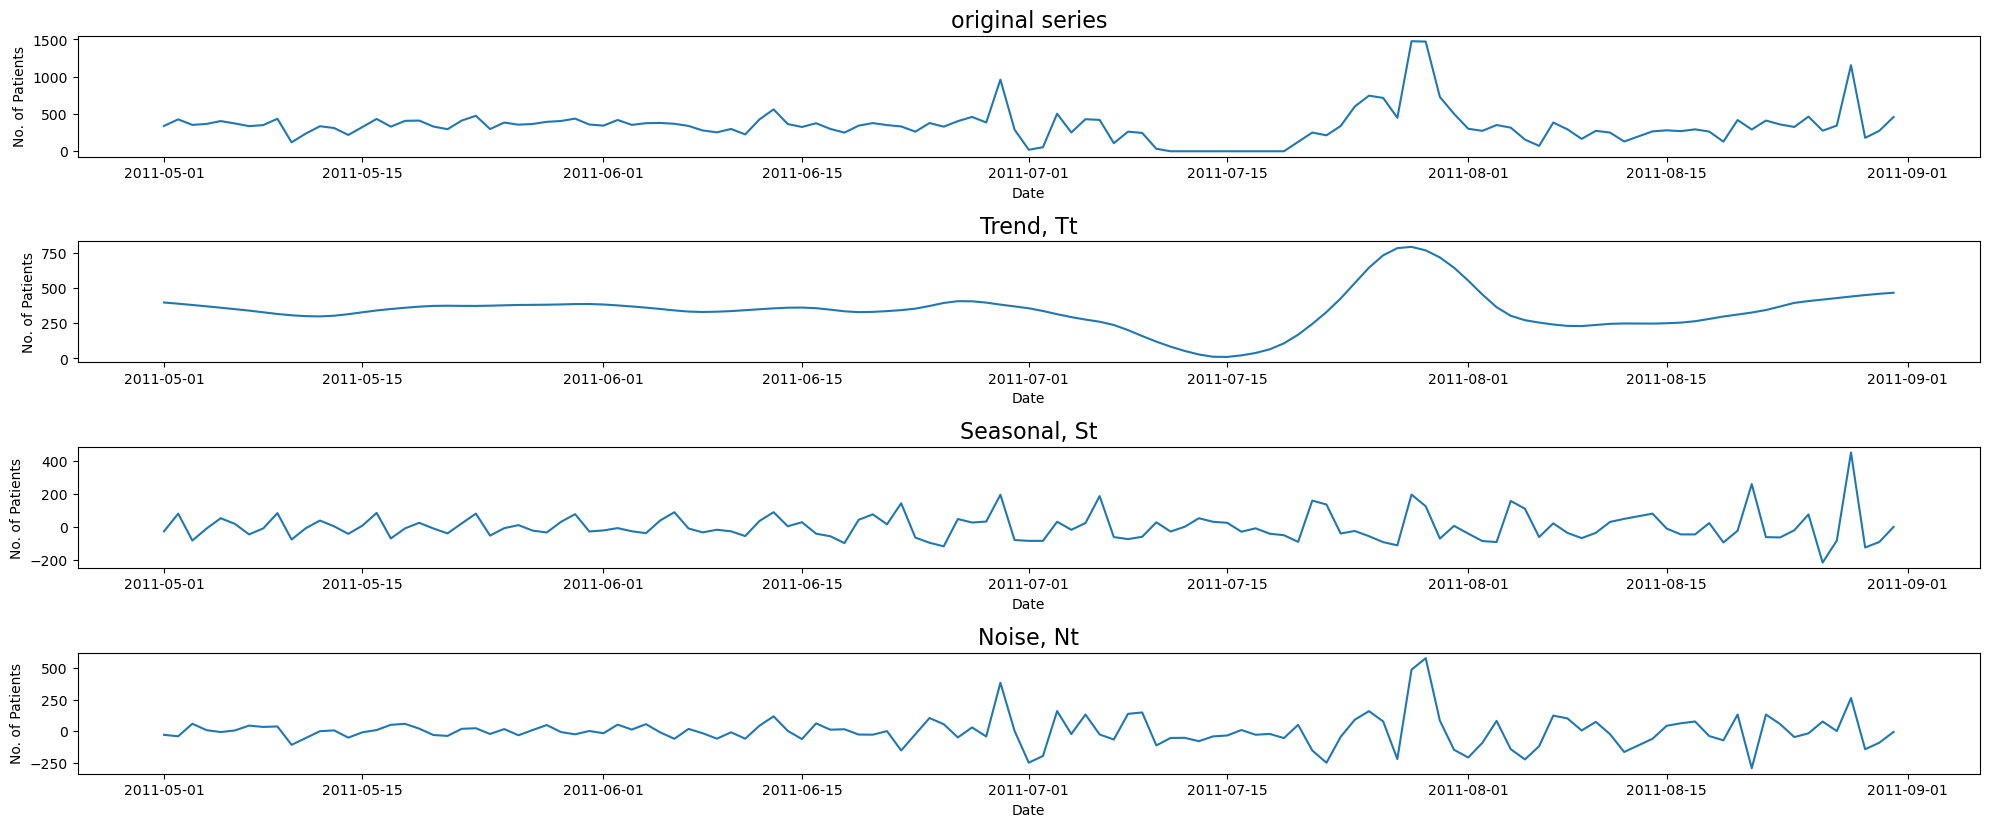

In [200]:
plt.figure(figsize = (20,10))

plt.subplot(5,1,1)
plt.plot(time_series_male)
plt.title('original series', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.subplot(5,1,2)
plt.plot(trend)
plt.title('Trend, Tt', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.subplot(5,1,3)
plt.plot(seasonal)
plt.title('Seasonal, St', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.subplot(5,1,4)
plt.plot(resid)
plt.title('Noise, Nt', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.tight_layout()

In [201]:
# Calculate Q1, Q3, and IQR
Q1 = time_series_male["total_males"].quantile(0.25)
Q3 = time_series_male["total_males"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")


Q1: 256.25, Q3: 404.75, IQR: 148.5
Lower Limit: 33.5, Upper Limit: 627.5


In [202]:
# Identify anomalies
time_series_male["is_anomaly"] = (time_series_male["total_males"] < lower_limit) | (time_series_male["total_males"] > upper_limit)

# Mark anomalies
anomalies = time_series_male[time_series_male["is_anomaly"]]
print(f"Anomalies:\n{anomalies}")


Anomalies:
            total_males  is_anomaly
Date                               
2011-06-29          961        True
2011-07-01           20        True
2011-07-10           33        True
2011-07-11            0        True
2011-07-12            0        True
2011-07-13            0        True
2011-07-14            0        True
2011-07-15            0        True
2011-07-16            0        True
2011-07-17            0        True
2011-07-18            0        True
2011-07-19            0        True
2011-07-25          746        True
2011-07-26          716        True
2011-07-28         1477        True
2011-07-29         1472        True
2011-07-30          729        True
2011-08-28         1155        True


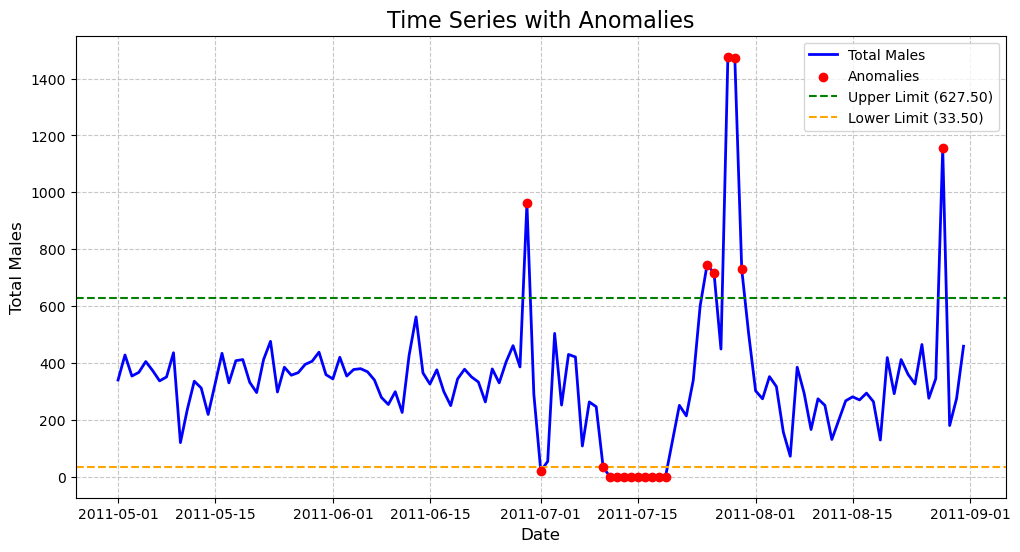

In [203]:
plt.figure(figsize=(12, 6))

# Plot the time series
plt.plot(time_series_male.index, time_series_male["total_males"], label="Total Males", color="blue", linewidth=2)

# Highlight anomalies
plt.scatter(anomalies.index, anomalies["total_males"], color="red", label="Anomalies", zorder=5)

# Add limits to the plot
plt.axhline(upper_limit, color="green", linestyle="--", label=f"Upper Limit ({upper_limit:.2f})")
plt.axhline(lower_limit, color="orange", linestyle="--", label=f"Lower Limit ({lower_limit:.2f})")

# Customize the plot
plt.title("Time Series with Anomalies", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Males", fontsize=12)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()


##### Time Series for females

In [204]:
# Compute total male per date
time_series_female = grouped.groupby("Date")["total_females"].sum().reset_index()

# Ensure the date column is in datetime format
time_series_female["Date"] = pd.to_datetime(time_series_female["Date"])

# Set the date as the index
time_series_female.set_index("Date", inplace=True)

In [205]:
# Perform STL decomposition
stl = STL(time_series_female["total_females"], period=7)  # Assuming weekly periodicity
result = stl.fit()

seasonal, trend, resid= result.seasonal, result.trend, result.resid


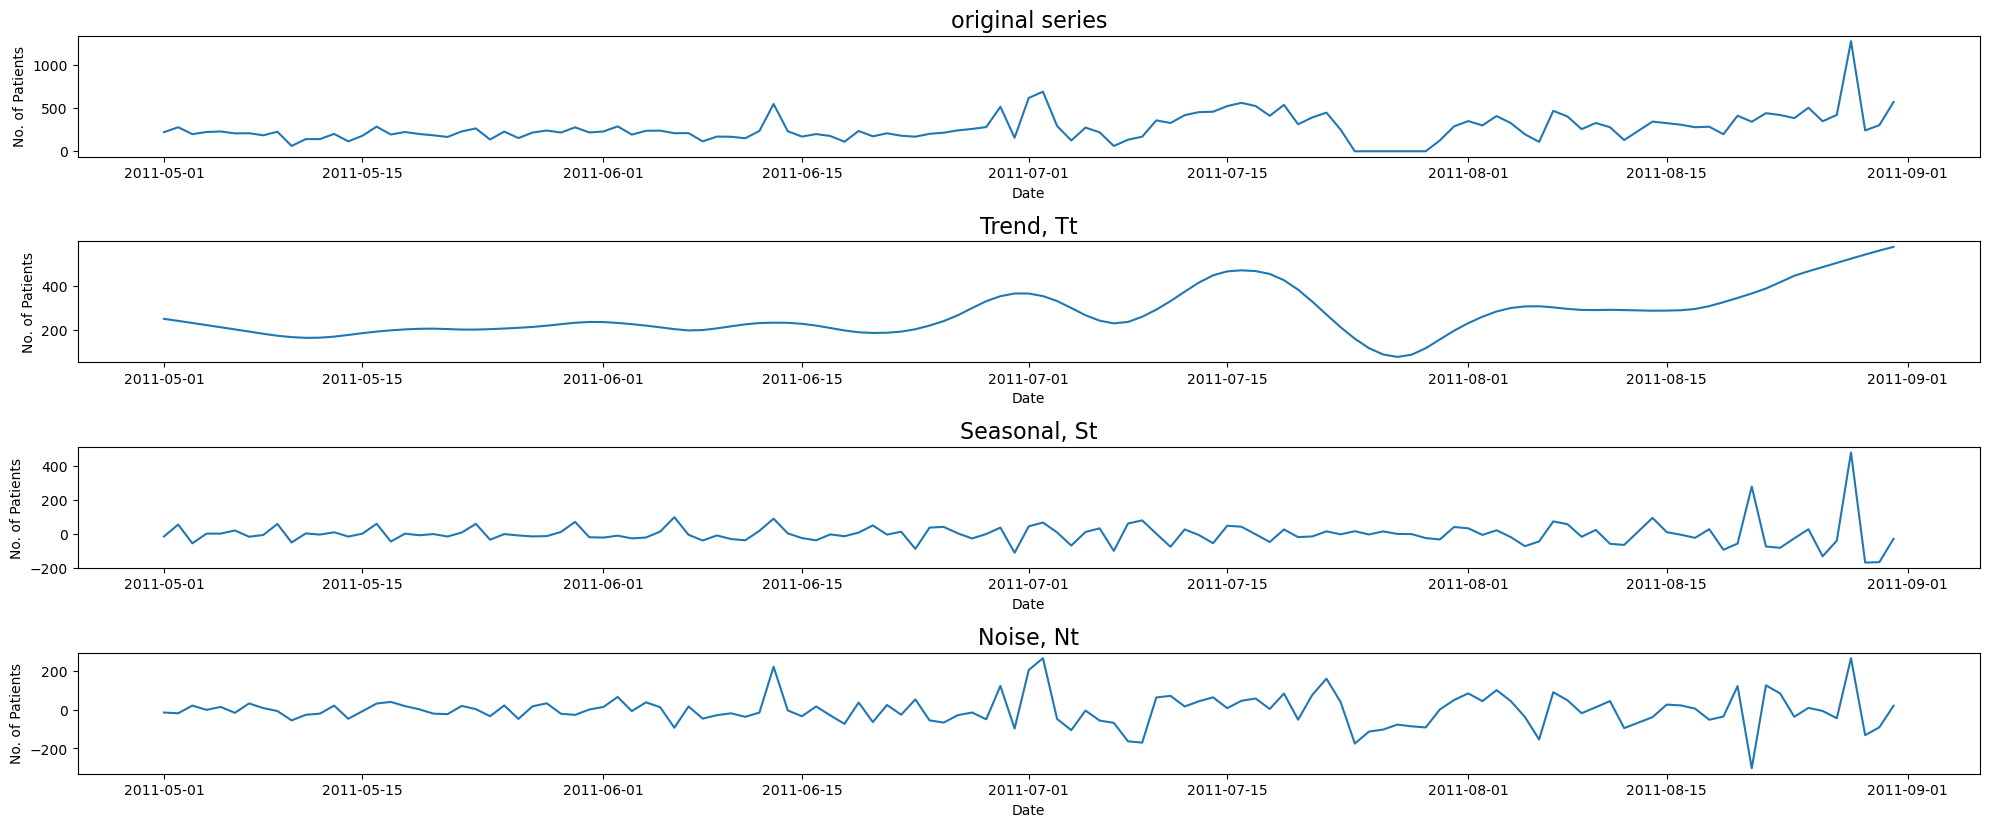

In [206]:
plt.figure(figsize = (20,10))

plt.subplot(5,1,1)
plt.plot(time_series_female)
plt.title('original series', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.subplot(5,1,2)
plt.plot(trend)
plt.title('Trend, Tt', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.subplot(5,1,3)
plt.plot(seasonal)
plt.title('Seasonal, St', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.subplot(5,1,4)
plt.plot(resid)
plt.title('Noise, Nt', fontsize = 16)
plt.xlabel("Date")
plt.ylabel("No. of Patients")

plt.tight_layout()

In [207]:
# Calculate Q1, Q3, and IQR
Q1 = time_series_female["total_females"].quantile(0.25)
Q3 = time_series_female["total_females"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")


Q1: 179.0, Q3: 326.0, IQR: 147.0
Lower Limit: -41.5, Upper Limit: 546.5


In [208]:
# Identify anomalies
time_series_female["is_anomaly"] = (time_series_female["total_females"] < lower_limit) | (time_series_female["total_females"] > upper_limit)

# Mark anomalies
anomalies = time_series_female[time_series_female["is_anomaly"]]
print(f"Anomalies:\n{anomalies}")


Anomalies:
            total_females  is_anomaly
Date                                 
2011-07-01            615        True
2011-07-02            687        True
2011-07-16            558        True
2011-08-28           1269        True
2011-08-31            567        True


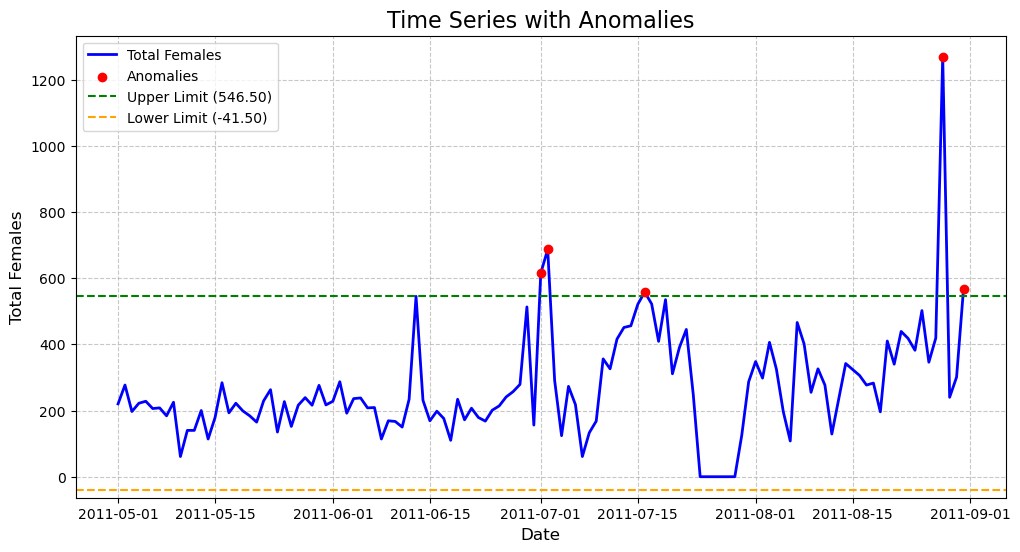

In [209]:
plt.figure(figsize=(12, 6))

# Plot the time series
plt.plot(time_series_female.index, time_series_female["total_females"], label="Total Females", color="blue", linewidth=2)

# Highlight anomalies
plt.scatter(anomalies.index, anomalies["total_females"], color="red", label="Anomalies", zorder=5)

# Add limits to the plot
plt.axhline(upper_limit, color="green", linestyle="--", label=f"Upper Limit ({upper_limit:.2f})")
plt.axhline(lower_limit, color="orange", linestyle="--", label=f"Lower Limit ({lower_limit:.2f})")

# Customize the plot
plt.title("Time Series with Anomalies", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Females", fontsize=12)
plt.legend()
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()


In [210]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,Age_Group
0,2011-05-01,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,"[10, 20)"
1,2011-05-01,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,"[20, 30)"
2,2011-05-01,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,"[40, 50)"
3,2011-05-01,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,"[20, 30)"
6,2011-05-01,20,Male,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,"[20, 30)"
...,...,...,...,...,...,...,...,...,...,...
83452,2011-08-31,31,Female,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,"[30, 40)"
83453,2011-08-31,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,"[30, 40)"
83454,2011-08-31,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,"[30, 40)"
83456,2011-08-31,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,"[40, 50)"


##### Data Aggregation using K means Clustering

In [211]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [212]:
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

In [213]:
# Selecting the features for clustering (Latitude and Longitude)
X = df[["Latitude", "Longitude"]].values
X

array([[31.62042 , 74.234381],
       [31.55217 , 74.27529 ],
       [31.57187 , 74.31826 ],
       ...,
       [31.57187 , 74.31826 ],
       [31.57741 , 74.31343 ],
       [31.57187 , 74.31826 ]])

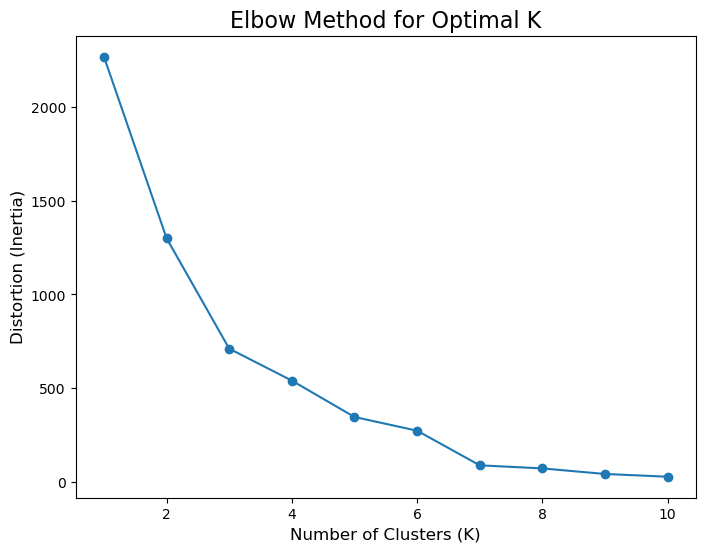

In [214]:
# Calculate the distortions for different cluster numbers
distortions = []
K_range = range(1, 11)  # Test for 1 to 10 clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Distortion (Inertia)', fontsize=12)
plt.show()

In [215]:
# Define the number of clusters (you can experiment with this number)
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model
df["Cluster"] = kmeans.fit_predict(X)

In [216]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,Age_Group,Cluster
0,2011-05-01,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,"[10, 20)",0
1,2011-05-01,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,"[20, 30)",0
2,2011-05-01,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,"[40, 50)",0
3,2011-05-01,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,"[20, 30)",0
6,2011-05-01,20,Male,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,"[20, 30)",0
...,...,...,...,...,...,...,...,...,...,...,...
83452,2011-08-31,31,Female,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,"[30, 40)",1
83453,2011-08-31,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,"[30, 40)",0
83454,2011-08-31,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,"[30, 40)",0
83456,2011-08-31,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,"[40, 50)",0


In [259]:
# Create a base map (you can use the center of your data or a fixed location)
map_center = [df["Latitude"].mean(), df["Longitude"].mean()]  # Center the map based on the data
m = folium.Map(location=map_center, zoom_start=12)

# Create a marker cluster object
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each data point (with cluster colors)
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=5,
        popup=f"Cluster: {row['Cluster']}, Address: {row['Address']}",
        color=plt.cm.rainbow(row["Cluster"] / 5.),  # Color by cluster
        fill=True,
        fill_color=plt.cm.rainbow(row["Cluster"] / 5.),
        fill_opacity=0.6,
    ).add_to(marker_cluster)

In [218]:
# Display the map
m.save("clustered_map.html")

In [219]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,Age_Group,Cluster
0,2011-05-01,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,"[10, 20)",0
1,2011-05-01,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,"[20, 30)",0
2,2011-05-01,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,"[40, 50)",0
3,2011-05-01,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,"[20, 30)",0
6,2011-05-01,20,Male,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,"[20, 30)",0
...,...,...,...,...,...,...,...,...,...,...,...
83452,2011-08-31,31,Female,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,"[30, 40)",1
83453,2011-08-31,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,"[30, 40)",0
83454,2011-08-31,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,"[30, 40)",0
83456,2011-08-31,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,"[40, 50)",0


In [220]:
# Extract the Month from the Date column
df["Month"] = df["Date"].dt.month

In [221]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,Age_Group,Cluster,Month
0,2011-05-01,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,"[10, 20)",0,5
1,2011-05-01,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,"[20, 30)",0,5
2,2011-05-01,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,"[40, 50)",0,5
3,2011-05-01,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,"[20, 30)",0,5
6,2011-05-01,20,Male,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,"[20, 30)",0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
83452,2011-08-31,31,Female,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,"[30, 40)",1,8
83453,2011-08-31,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,"[30, 40)",0,8
83454,2011-08-31,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,"[30, 40)",0,8
83456,2011-08-31,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,"[40, 50)",0,8


##### Data Aggregation using K means CLustering based upon sex and month

In [222]:
df_males_agg_may = df[(df['Sex'] == 'Male') & (df['Month'] == 5)]
df_males_agg_june = df[(df['Sex'] == 'Male') & (df['Month'] == 6)]
df_males_agg_july = df[(df['Sex'] == 'Male') & (df['Month'] == 7)]
df_males_agg_aug = df[(df['Sex'] == 'Male') & (df['Month'] == 8)]

df_females_agg_may = df[(df['Sex'] == 'Female') & (df['Month'] == 5)]
df_females_agg_june = df[(df['Sex'] == 'Female') & (df['Month'] == 6)]
df_females_agg_july = df[(df['Sex'] == 'Female') & (df['Month'] == 7)]
df_females_agg_aug = df[(df['Sex'] == 'Female') & (df['Month'] == 8)]

In [223]:
# Remove 'Cluster' column from each dataset
datasets = {
    "males_may": df[(df["Sex"] == "Male") & (df["Month"] == 5)],
    "males_june": df[(df["Sex"] == "Male") & (df["Month"] == 6)],
    "males_july": df[(df["Sex"] == "Male") & (df["Month"] == 7)],
    "males_aug": df[(df["Sex"] == "Male") & (df["Month"] == 8)],
    "females_may": df[(df["Sex"] == "Female") & (df["Month"] == 5)],
    "females_june": df[(df["Sex"] == "Female") & (df["Month"] == 6)],
    "females_july": df[(df["Sex"] == "Female") & (df["Month"] == 7)],
    "females_aug": df[(df["Sex"] == "Female") & (df["Month"] == 8)],
}

# Drop 'Cluster' column from each dataset if it exists
for key, dataset in datasets.items():
    if "Cluster" in dataset.columns:
        datasets[key] = dataset.drop(columns=["Cluster"])



In [224]:
datasets


{'males_may':             Date  Age   Sex 1st complaint  2nd Complaint 3rd Complaint  \
 0     2011-05-01   18  Male         fever      bodyaches      Headache   
 1     2011-05-01   20  Male          pain       bleeding           RTA   
 2     2011-05-01   40  Male       Dyspnea     chest pain           RTI   
 3     2011-05-01   24  Male      headache        allergy      Vomiting   
 6     2011-05-01   20  Male          pain       bleeding           RTA   
 ...          ...  ...   ...           ...            ...           ...   
 19471 2011-05-31   28  Male         fever       vomiting     bodyaches   
 19472 2011-05-31   30  Male         fever         chills    arthralgia   
 19473 2011-05-31   25  Male   insect bite       swelling          pain   
 19475 2011-05-31   26  Male      vomiting       tinnitus     arthragia   
 19477 2011-05-31   50  Male         fever  myoarthralgia        chills   
 
                Address  Latitude  Longitude Age_Group  Month  
 0      KOT ABDUL MAL

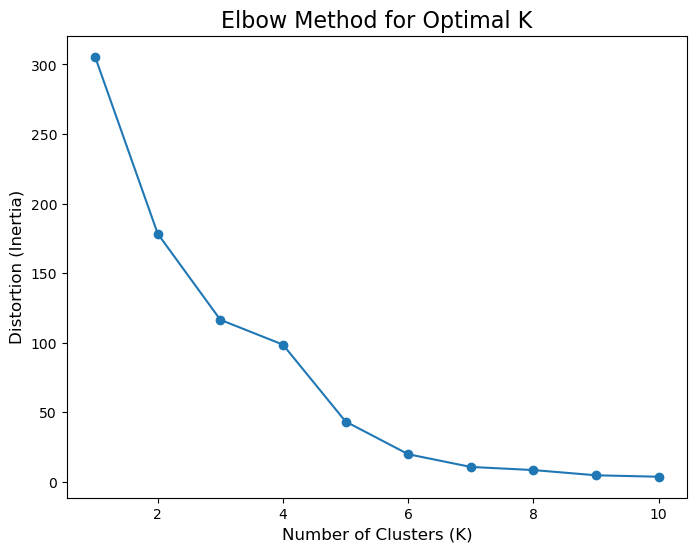

In [225]:
def find_optimal_k(data):
    # Select features for clustering
    X = data[["Latitude", "Longitude"]].dropna().values

    # Calculate distortions for different numbers of clusters
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(K_range, distortions, marker="o")
    plt.title("Elbow Method for Optimal K", fontsize=16)
    plt.xlabel("Number of Clusters (K)", fontsize=12)
    plt.ylabel("Distortion (Inertia)", fontsize=12)
    plt.show()

# Example: Find the optimal K for males in May
find_optimal_k(datasets["males_may"])


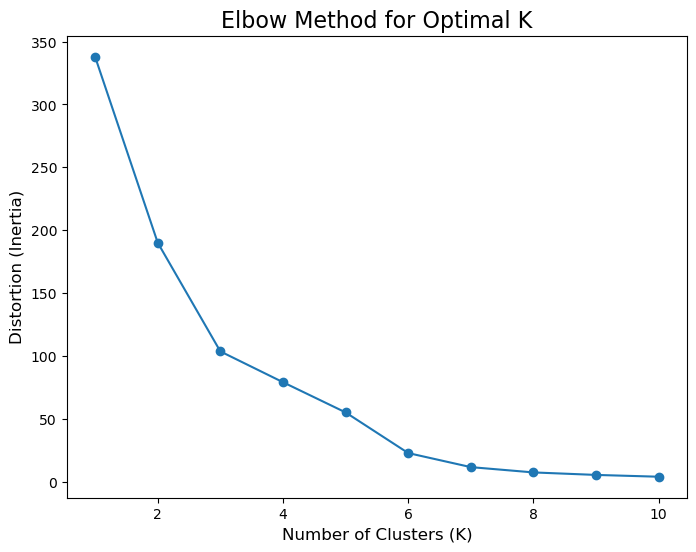

In [226]:
def find_optimal_k(data):
    # Select features for clustering
    X = data[["Latitude", "Longitude"]].dropna().values

    # Calculate distortions for different numbers of clusters
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(K_range, distortions, marker="o")
    plt.title("Elbow Method for Optimal K", fontsize=16)
    plt.xlabel("Number of Clusters (K)", fontsize=12)
    plt.ylabel("Distortion (Inertia)", fontsize=12)
    plt.show()

# Example: Find the optimal K for males in May
find_optimal_k(datasets["males_june"])


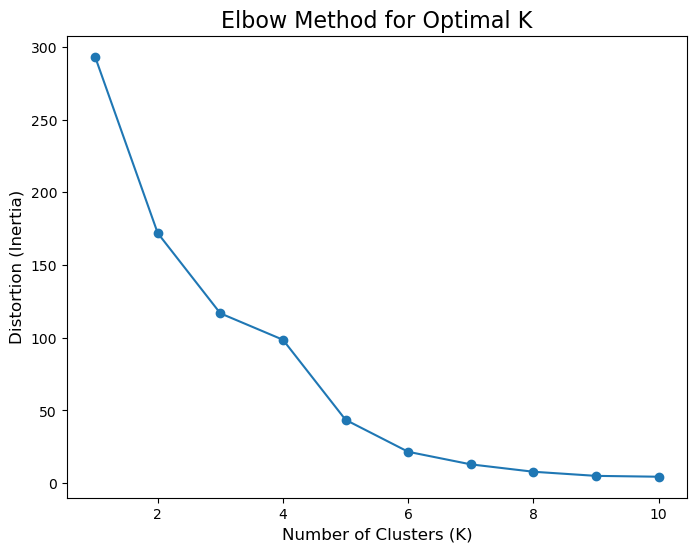

In [227]:
def find_optimal_k(data):
    # Select features for clustering
    X = data[["Latitude", "Longitude"]].dropna().values

    # Calculate distortions for different numbers of clusters
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(K_range, distortions, marker="o")
    plt.title("Elbow Method for Optimal K", fontsize=16)
    plt.xlabel("Number of Clusters (K)", fontsize=12)
    plt.ylabel("Distortion (Inertia)", fontsize=12)
    plt.show()

# Example: Find the optimal K for males in May
find_optimal_k(datasets["males_aug"])



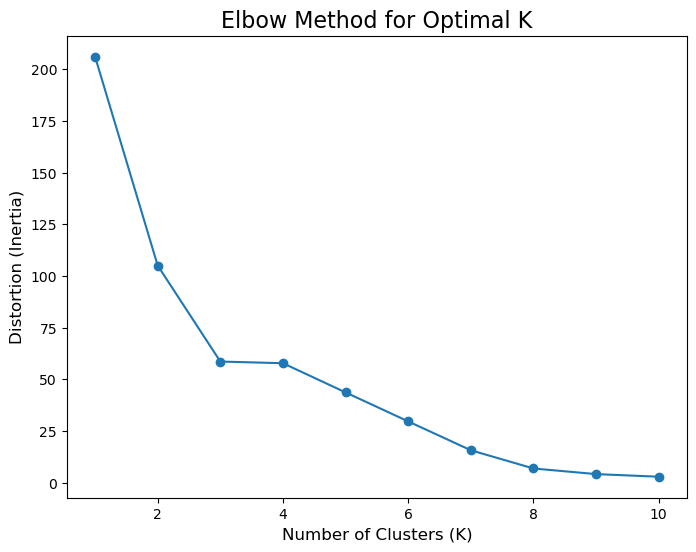

In [228]:

def find_optimal_k(data):
    # Select features for clustering
    X = data[["Latitude", "Longitude"]].dropna().values

    # Calculate distortions for different numbers of clusters
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(K_range, distortions, marker="o")
    plt.title("Elbow Method for Optimal K", fontsize=16)
    plt.xlabel("Number of Clusters (K)", fontsize=12)
    plt.ylabel("Distortion (Inertia)", fontsize=12)
    plt.show()

# Example: Find the optimal K for males in May
find_optimal_k(datasets["females_may"])


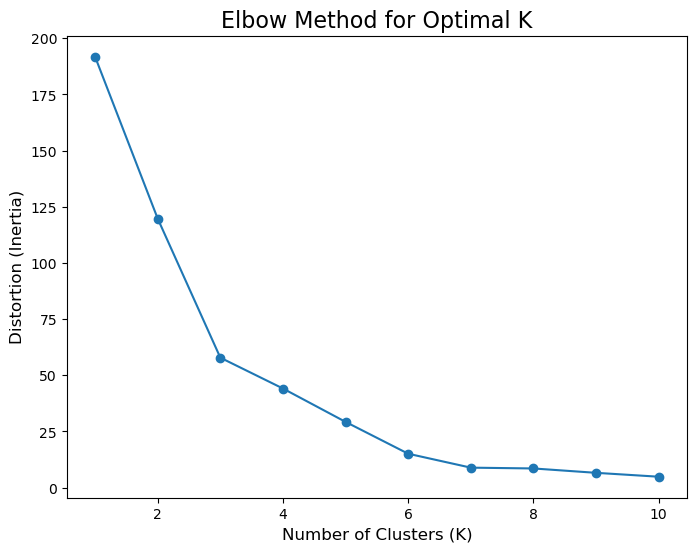

In [229]:

def find_optimal_k(data):
    # Select features for clustering
    X = data[["Latitude", "Longitude"]].dropna().values

    # Calculate distortions for different numbers of clusters
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(K_range, distortions, marker="o")
    plt.title("Elbow Method for Optimal K", fontsize=16)
    plt.xlabel("Number of Clusters (K)", fontsize=12)
    plt.ylabel("Distortion (Inertia)", fontsize=12)
    plt.show()

# Example: Find the optimal K for males in May
find_optimal_k(datasets["females_june"])



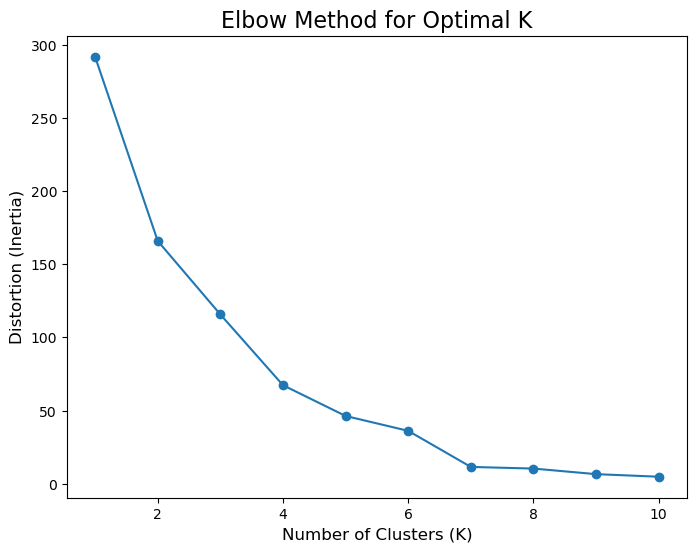

In [230]:

def find_optimal_k(data):
    # Select features for clustering
    X = data[["Latitude", "Longitude"]].dropna().values

    # Calculate distortions for different numbers of clusters
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(K_range, distortions, marker="o")
    plt.title("Elbow Method for Optimal K", fontsize=16)
    plt.xlabel("Number of Clusters (K)", fontsize=12)
    plt.ylabel("Distortion (Inertia)", fontsize=12)
    plt.show()

# Example: Find the optimal K for males in May
find_optimal_k(datasets["females_july"])


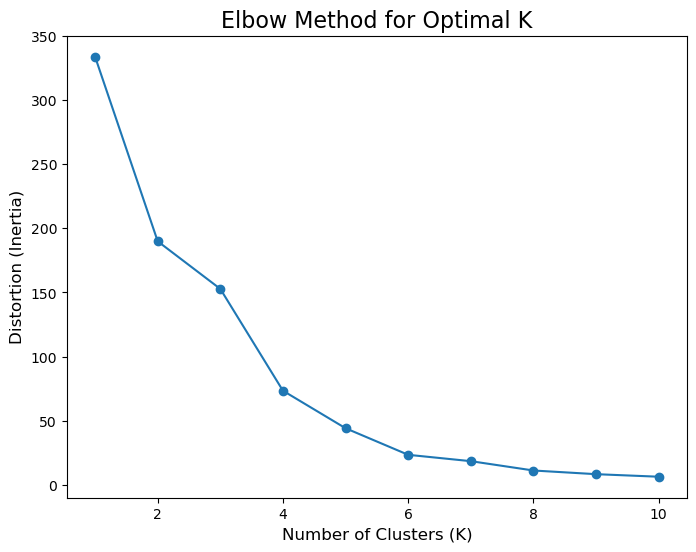

In [231]:

def find_optimal_k(data):
    # Select features for clustering
    X = data[["Latitude", "Longitude"]].dropna().values

    # Calculate distortions for different numbers of clusters
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(K_range, distortions, marker="o")
    plt.title("Elbow Method for Optimal K", fontsize=16)
    plt.xlabel("Number of Clusters (K)", fontsize=12)
    plt.ylabel("Distortion (Inertia)", fontsize=12)
    plt.show()

# Example: Find the optimal K for males in May
find_optimal_k(datasets["females_aug"])


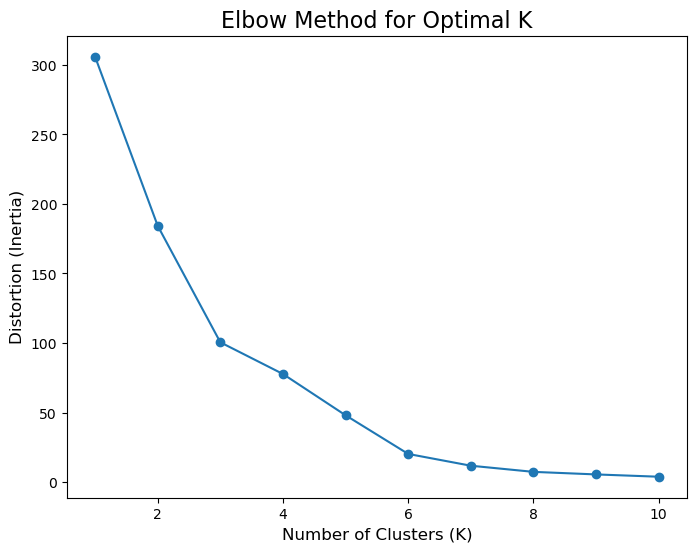

In [232]:

def find_optimal_k(data):
    # Select features for clustering
    X = data[["Latitude", "Longitude"]].dropna().values

    # Calculate distortions for different numbers of clusters
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(K_range, distortions, marker="o")
    plt.title("Elbow Method for Optimal K", fontsize=16)
    plt.xlabel("Number of Clusters (K)", fontsize=12)
    plt.ylabel("Distortion (Inertia)", fontsize=12)
    plt.show()

# Example: Find the optimal K for males in May
find_optimal_k(datasets["males_july"])


In [233]:
def apply_kmeans_clustering(data, n_clusters):
    # Select features for clustering
    X = data[["Latitude", "Longitude"]].dropna().values

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    data["Cluster"] = kmeans.fit_predict(X)

    return data, kmeans

# Apply clustering to each dataset
clustered_datasets = {}
for key, dataset in datasets.items():
    # Assuming 5 clusters for simplicity; replace with optimal K for each dataset
    clustered_datasets[key], _ = apply_kmeans_clustering(dataset, n_clusters=5)


In [234]:
clustered_datasets["males_june"]

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,Age_Group,Month,Cluster
19480,2011-06-01,40,Male,pain,bleeding,RTA,Bhati Gate,31.580200,74.307300,"[40, 50)",6,0
19481,2011-06-01,19,Male,Itching,Irritation,Allergy,Gulshan-e-Ravi,31.552170,74.275290,"[10, 20)",6,0
19482,2011-06-01,25,Male,bleeding,pain,RTA,Bhati Gate,31.580200,74.307300,"[20, 30)",6,0
19486,2011-06-01,25,Male,pain,bleeding,RTA,"Ravi Road, Lahore",31.549700,74.343600,"[20, 30)",6,0
19488,2011-06-01,72,Male,cough,SOB,RTI,Nisbat Road,31.569897,74.320210,"[70, 80)",6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67974,2011-06-13,36,Male,insect bite,flu,arthralgia,Badami Bagh,31.601849,74.320621,"[30, 40)",6,0
67982,2011-06-13,72,Male,fever,nausea,headache,Gawalmandi,31.571870,74.318260,"[70, 80)",6,0
67983,2011-06-13,33,Male,fever,pain epigastrium,nausea,"MISRISHAH,LAHORE",31.593401,74.330886,"[30, 40)",6,0
67986,2011-06-13,70,Male,severe pain in body,flu,arthralgia,Gawalmandi,31.571870,74.318260,"[70, 80)",6,0


In [235]:
def create_folium_map(clustered_data, output_file):
    # Create a base map centered on the data
    map_center = [clustered_data["Latitude"].mean(), clustered_data["Longitude"].mean()]
    m = folium.Map(location=map_center, zoom_start=12)

    # Create a marker cluster object
    marker_cluster = MarkerCluster().add_to(m)

    # Add markers for each point in the dataset
    for idx, row in clustered_data.iterrows():
        folium.CircleMarker(
            location=[row["Latitude"], row["Longitude"]],
            radius=5,
            popup=f"Cluster: {row['Cluster']}, Address: {row['Address']}",
            color=plt.cm.rainbow(row["Cluster"] / 5.0),  # Adjust for cluster count
            fill=True,
            fill_color=plt.cm.rainbow(row["Cluster"] / 5.0),
            fill_opacity=0.6,
        ).add_to(marker_cluster)

    # Save the map to an HTML file
    m.save(output_file)
    print(f"Map saved to {output_file}")

In [236]:
create_folium_map(clustered_datasets["males_may"], "males_may_clusters.html")

Map saved to males_may_clusters.html


In [237]:
create_folium_map(clustered_datasets["males_june"], "males_june_clusters.html")

Map saved to males_june_clusters.html


In [238]:
create_folium_map(clustered_datasets["males_july"], "males_july_clusters.html")

Map saved to males_july_clusters.html


In [239]:
create_folium_map(clustered_datasets["males_aug"], "males_aug_clusters.html")

Map saved to males_aug_clusters.html


In [240]:
create_folium_map(clustered_datasets["females_june"], "females_june_clusters.html")

Map saved to females_june_clusters.html


In [241]:
create_folium_map(clustered_datasets["females_may"], "females_may_clusters.html")

Map saved to females_may_clusters.html


In [242]:
create_folium_map(clustered_datasets["females_july"], "females_july_clusters.html")

Map saved to females_july_clusters.html


In [243]:
create_folium_map(clustered_datasets["females_aug"], "females_aug_clusters.html")

Map saved to females_aug_clusters.html


In [244]:
df

,Date,Age,Sex,1st complaint,2nd Complaint,3rd Complaint,Address,Latitude,Longitude,Age_Group,Cluster,Month
0,2011-05-01,18,Male,fever,bodyaches,Headache,KOT ABDUL MALIK,31.620420,74.234381,"[10, 20)",0,5
1,2011-05-01,20,Male,pain,bleeding,RTA,Gulshan-e-Ravi,31.552170,74.275290,"[20, 30)",0,5
2,2011-05-01,40,Male,Dyspnea,chest pain,RTI,Gawalmandi,31.571870,74.318260,"[40, 50)",0,5
3,2011-05-01,24,Male,headache,allergy,Vomiting,KOT ABDUL MALIK,31.620420,74.234381,"[20, 30)",0,5
6,2011-05-01,20,Male,pain,bleeding,RTA,Gawalmandi,31.571870,74.318260,"[20, 30)",0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
83452,2011-08-31,31,Female,Fever,Chills,Body pains,Gujranwala,32.166351,74.195900,"[30, 40)",1,8
83453,2011-08-31,35,Female,Vomiting,fever,nausea,Anarkali Bazaar Lahore,31.569800,74.312000,"[30, 40)",0,8
83454,2011-08-31,35,Female,Arthritis,Anxiety,arthralgia,Gawalmandi,31.571870,74.318260,"[30, 40)",0,8
83456,2011-08-31,46,Male,Palpitation,anxiety,arthralgia,Lahori Gate,31.577410,74.313430,"[40, 50)",0,8


In [245]:
# Export to CSV
df.to_csv("output_file.csv", index=False)


In [246]:
# Export to CSV
datasets['males_june'].to_csv("males_june.csv", index=False)


In [247]:
# Export to CSV
datasets['males_may'].to_csv("males_may.csv", index=False)


In [248]:
# Export to CSV
datasets['males_july'].to_csv("males_july.csv", index=False)


In [249]:
# Export to CSV
datasets['males_aug'].to_csv("males_aug.csv", index=False)


In [250]:
# Export to CSV
datasets['females_may'].to_csv("females_may.csv", index=False)


In [251]:
# Export to CSV
datasets['females_june'].to_csv("females_june.csv", index=False)


In [252]:
# Export to CSV
datasets['females_july'].to_csv("females_july.csv", index=False)


In [253]:
# Export to CSV
datasets['females_aug'].to_csv("females_aug.csv", index=False)


#### Time Series Forecasting 

In [260]:
# Aggregating total males and females for each date
aggregated_data = df.groupby("Date").agg(
    total_males=("Sex", lambda x: (x == "Male").sum()),  # Count males
    total_females=("Sex", lambda x: (x == "Female").sum()),  # Count females
)

In [261]:
aggregated_data

,total_males,total_females
Date,,
2011-05-01,340,220
2011-05-02,428,277
2011-05-03,354,197
2011-05-04,367,222
2011-05-05,405,228
...,...,...
2011-08-27,345,419
2011-08-28,1155,1269
2011-08-29,180,240


In [262]:
# Aggregating age group distribution for males and females
age_group_males = df[df["Sex"] == "Male"].groupby(["Date", "Age_Group"]).size().unstack(fill_value=0)
age_group_females = df[df["Sex"] == "Female"].groupby(["Date", "Age_Group"]).size().unstack(fill_value=0)

C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\2712188946.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_males = df[df["Sex"] == "Male"].groupby(["Date", "Age_Group"]).size().unstack(fill_value=0)
C:\Users\drfak\AppData\Local\Temp\ipykernel_12844\2712188946.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_females = df[df["Sex"] == "Female"].groupby(["Date", "Age_Group"]).size().unstack(fill_value=0)


In [263]:
age_group_females

Age_Group,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
Date,,,,,,,,,,
2011-05-01,0,38,62,35,43,22,13,7,0,0
2011-05-02,0,55,51,43,62,31,24,11,0,0
2011-05-03,0,33,40,33,40,25,15,11,0,0
2011-05-04,0,34,54,40,50,20,15,9,0,0
2011-05-05,0,46,54,32,42,29,15,10,0,0
...,...,...,...,...,...,...,...,...,...,...
2011-08-27,0,123,138,55,48,20,21,14,0,0
2011-08-28,0,370,410,159,141,82,59,48,0,0
2011-08-29,0,73,69,38,22,20,13,5,0,0


In [264]:
# Reset index on age group data to ensure 'Date' is the index
age_group_males = age_group_males.reset_index().set_index("Date")
age_group_females = age_group_females.reset_index().set_index("Date")

# Merge aggregated data with age group distributions
final_data = aggregated_data.join(age_group_males, how="left", rsuffix="_males")
final_data = final_data.join(age_group_females, how="left", rsuffix="_females")

# Fill missing values with 0 for age groups
final_data = final_data.fillna(0)

In [265]:
final_data

,total_males,total_females,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)",...,"[0, 10)_females","[10, 20)_females","[20, 30)_females","[30, 40)_females","[40, 50)_females","[50, 60)_females","[60, 70)_females","[70, 80)_females","[80, 90)_females","[90, 100)_females"
Date,,,,,,,,,,,,,,,,,,,,,
2011-05-01,340,220,0.0,61.0,118.0,52.0,50.0,24.0,19.0,16.0,...,0.0,38.0,62.0,35.0,43.0,22.0,13.0,7.0,0.0,0.0
2011-05-02,428,277,0.0,61.0,135.0,74.0,66.0,54.0,21.0,17.0,...,0.0,55.0,51.0,43.0,62.0,31.0,24.0,11.0,0.0,0.0
2011-05-03,354,197,0.0,61.0,121.0,59.0,38.0,25.0,15.0,35.0,...,0.0,33.0,40.0,33.0,40.0,25.0,15.0,11.0,0.0,0.0
2011-05-04,367,222,0.0,50.0,141.0,49.0,43.0,53.0,20.0,11.0,...,0.0,34.0,54.0,40.0,50.0,20.0,15.0,9.0,0.0,0.0
2011-05-05,405,228,0.0,66.0,130.0,74.0,53.0,32.0,18.0,32.0,...,0.0,46.0,54.0,32.0,42.0,29.0,15.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-27,345,419,0.0,0.0,97.0,80.0,82.0,50.0,19.0,17.0,...,0.0,123.0,138.0,55.0,48.0,20.0,21.0,14.0,0.0,0.0
2011-08-28,1155,1269,0.0,0.0,266.0,311.0,228.0,154.0,119.0,77.0,...,0.0,370.0,410.0,159.0,141.0,82.0,59.0,48.0,0.0,0.0
2011-08-29,180,240,0.0,0.0,42.0,52.0,43.0,23.0,11.0,9.0,...,0.0,73.0,69.0,38.0,22.0,20.0,13.0,5.0,0.0,0.0


In [268]:
from sklearn.model_selection import train_test_split

# Assuming final_data is the aggregated dataset with Date as the index
# Reset index to ensure Date is a column
final_data = final_data.reset_index()

In [269]:
final_data

,Date,total_males,total_females,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)",...,"[0, 10)_females","[10, 20)_females","[20, 30)_females","[30, 40)_females","[40, 50)_females","[50, 60)_females","[60, 70)_females","[70, 80)_females","[80, 90)_females","[90, 100)_females"
0,2011-05-01,5.831882,5.398163,0.0,4.127134,4.779123,3.970292,3.931826,3.218876,2.995732,...,0.0,3.663562,4.143135,3.583519,3.784190,3.135494,2.639057,2.079442,0.0,0.0
1,2011-05-02,6.061457,5.627621,0.0,4.127134,4.912655,4.317488,4.204693,4.007333,3.091042,...,0.0,4.025352,3.951244,3.784190,4.143135,3.465736,3.218876,2.484907,0.0,0.0
2,2011-05-03,5.872118,5.288267,0.0,4.127134,4.804021,4.094345,3.663562,3.258097,2.772589,...,0.0,3.526361,3.713572,3.526361,3.713572,3.258097,2.772589,2.484907,0.0,0.0
3,2011-05-04,5.908083,5.407172,0.0,3.931826,4.955827,3.912023,3.784190,3.988984,3.044522,...,0.0,3.555348,4.007333,3.713572,3.931826,3.044522,2.772589,2.302585,0.0,0.0
4,2011-05-05,6.006353,5.433722,0.0,4.204693,4.875197,4.317488,3.988984,3.496508,2.944439,...,0.0,3.850148,4.007333,3.496508,3.761200,3.401197,2.772589,2.397895,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2011-08-27,5.846439,6.040255,0.0,0.000000,4.584967,4.394449,4.418841,3.931826,2.995732,...,0.0,4.820282,4.934474,4.025352,3.891820,3.044522,3.091042,2.708050,0.0,0.0
118,2011-08-28,7.052721,7.146772,0.0,0.000000,5.587249,5.743003,5.433722,5.043425,4.787492,...,0.0,5.916202,6.018593,5.075174,4.955827,4.418841,4.094345,3.891820,0.0,0.0
119,2011-08-29,5.198497,5.484797,0.0,0.000000,3.761200,3.970292,3.784190,3.178054,2.484907,...,0.0,4.304065,4.248495,3.663562,3.135494,3.044522,2.639057,1.791759,0.0,0.0
120,2011-08-30,5.620401,5.710427,0.0,0.000000,4.262680,4.043051,4.077537,3.496508,3.433987,...,0.0,4.691348,4.574711,3.295837,3.367296,3.178054,2.197225,2.564949,0.0,0.0


In [270]:
# Convert 'Date' to datetime format and then to ordinal for regression modeling
final_data["Date_ordinal"] = final_data["Date"].apply(lambda x: x.toordinal())



In [271]:
# Features (X) and targets (y)
X = final_data[["Date_ordinal"]]  # Date as the feature (converted to ordinal)

In [272]:
y = final_data.drop(columns=["Date", "Date_ordinal"])  # Targets: totals and age groups

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Training Targets Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Testing Targets Shape: {y_test.shape}")

Training Features Shape: (97, 1)
Training Targets Shape: (97, 22)
Testing Features Shape: (25, 1)
Testing Targets Shape: (25, 22)


In [273]:
X

,Date_ordinal
0,734258
1,734259
2,734260
3,734261
4,734262
...,...
117,734376
118,734377
119,734378
120,734379


In [274]:
y

,total_males,total_females,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)",...,"[0, 10)_females","[10, 20)_females","[20, 30)_females","[30, 40)_females","[40, 50)_females","[50, 60)_females","[60, 70)_females","[70, 80)_females","[80, 90)_females","[90, 100)_females"
0,5.831882,5.398163,0.0,4.127134,4.779123,3.970292,3.931826,3.218876,2.995732,2.833213,...,0.0,3.663562,4.143135,3.583519,3.784190,3.135494,2.639057,2.079442,0.0,0.0
1,6.061457,5.627621,0.0,4.127134,4.912655,4.317488,4.204693,4.007333,3.091042,2.890372,...,0.0,4.025352,3.951244,3.784190,4.143135,3.465736,3.218876,2.484907,0.0,0.0
2,5.872118,5.288267,0.0,4.127134,4.804021,4.094345,3.663562,3.258097,2.772589,3.583519,...,0.0,3.526361,3.713572,3.526361,3.713572,3.258097,2.772589,2.484907,0.0,0.0
3,5.908083,5.407172,0.0,3.931826,4.955827,3.912023,3.784190,3.988984,3.044522,2.484907,...,0.0,3.555348,4.007333,3.713572,3.931826,3.044522,2.772589,2.302585,0.0,0.0
4,6.006353,5.433722,0.0,4.204693,4.875197,4.317488,3.988984,3.496508,2.944439,3.496508,...,0.0,3.850148,4.007333,3.496508,3.761200,3.401197,2.772589,2.397895,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,5.846439,6.040255,0.0,0.000000,4.584967,4.394449,4.418841,3.931826,2.995732,2.890372,...,0.0,4.820282,4.934474,4.025352,3.891820,3.044522,3.091042,2.708050,0.0,0.0
118,7.052721,7.146772,0.0,0.000000,5.587249,5.743003,5.433722,5.043425,4.787492,4.356709,...,0.0,5.916202,6.018593,5.075174,4.955827,4.418841,4.094345,3.891820,0.0,0.0
119,5.198497,5.484797,0.0,0.000000,3.761200,3.970292,3.784190,3.178054,2.484907,2.302585,...,0.0,4.304065,4.248495,3.663562,3.135494,3.044522,2.639057,1.791759,0.0,0.0
120,5.620401,5.710427,0.0,0.000000,4.262680,4.043051,4.077537,3.496508,3.433987,3.401197,...,0.0,4.691348,4.574711,3.295837,3.367296,3.178054,2.197225,2.564949,0.0,0.0


##### Time Series Forecasting using Random Forest Regression

In [275]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Train the model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model.predict(X_test)

In [276]:
y_pred_rf

array([[5.93759115e+00, 5.34308907e+00, 0.00000000e+00, 4.23645475e+00,
        4.81738983e+00, 4.24339361e+00, 3.84832667e+00, 3.54796056e+00,
        3.08689164e+00, 2.73216531e+00, 6.00000000e-02, 0.00000000e+00,
        0.00000000e+00, 3.62698481e+00, 3.94811700e+00, 3.76159088e+00,
        3.70010175e+00, 2.72895747e+00, 2.79672090e+00, 2.11031272e+00,
        7.51225636e-01, 0.00000000e+00],
       [6.05218095e+00, 5.60765151e+00, 0.00000000e+00, 4.09938381e+00,
        4.76845234e+00, 4.35116533e+00, 4.24375931e+00, 3.86059826e+00,
        3.43591014e+00, 3.06734365e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.89648090e+00, 4.47157066e+00, 3.83748321e+00,
        3.60894370e+00, 3.38634009e+00, 2.61161959e+00, 2.55893262e+00,
        0.00000000e+00, 0.00000000e+00],
       [5.81223079e+00, 5.14439784e+00, 0.00000000e+00, 4.01982700e+00,
        4.64565104e+00, 4.10549264e+00, 3.94858760e+00, 3.43003304e+00,
        3.08404982e+00, 2.64017581e+00, 0.00000000e+00

In [277]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [278]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_rf, multioutput="raw_values")
mse = mean_squared_error(y_test, y_pred_rf, multioutput="raw_values")

print(f"Mean Absolute Errors for each target: {mae}")
print(f"Mean Squared Errors for each target: {mse}")

Mean Absolute Errors for each target: [0.30614844 0.32264416 0.         0.15429519 0.34457182 0.33082446
 0.34192008 0.40012205 0.43068971 0.45133188 0.2132     0.
 0.         0.33514912 0.38914941 0.39089699 0.36767108 0.43337102
 0.35606908 0.4809218  0.04391197 0.        ]
Mean Squared Errors for each target: [0.2224742  0.22849022 0.         0.04930314 0.23905104 0.26460411
 0.23311102 0.28989746 0.38732582 0.4315748  0.293908   0.
 0.         0.20972144 0.26338595 0.23391806 0.21699289 0.33627653
 0.25787945 0.35402067 0.02163231 0.        ]


In [279]:
from sklearn.metrics import r2_score

# Calculate R-squared (R²) for each target
r2 = r2_score(y_test, y_pred_rf, multioutput="raw_values")
print(f"R-squared (R²) for each target: {r2}")

R-squared (R²) for each target: [ 0.86146918  0.82680838  1.          0.9842858   0.80937991  0.72345022
  0.72294329  0.61332852  0.45762003  0.32422095 -0.37083955  1.
  1.          0.75468708  0.70626822  0.66948046  0.6736909   0.447981
  0.45046633  0.20889094  0.38824963  1.        ]


##### Using SVM

In [280]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

In [281]:
# Define the parameter distributions for C and Gamma
param_dist = {
    'estimator__C': loguniform(1e-3, 1e3),  # Searching between 10^-3 and 10^3 for C
    'estimator__gamma': loguniform(1e-3, 1e3)  # Searching between 10^-3 and 10^3 for Gamma
}

# Create an SVR model (Support Vector Regressor) inside MultiOutputRegressor
svr_model = MultiOutputRegressor(SVR(kernel='rbf'))

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svr_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of random parameter combinations to try
    cv=3,       # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # For regression, use negative MSE
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    verbose=2
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=MultiOutputRegressor(estimator=SVR()),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'estimator__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014506524260>,
                                        'estimator__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014506657AA0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [282]:
# Get the best parameters and model from the RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters Found:", best_params)

best_model = random_search.best_estimator_

# Evaluate the model on the test set
y_pred_svr = best_model.predict(X_test)

# Evaluate the performance using MSE and R^2
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Best Parameters Found: {'estimator__C': 43.00001586162607, 'estimator__gamma': 0.015570196345516612}
Mean Squared Error (MSE): 0.2236358855778312
R^2 Score: 0.6588251564530184


In [283]:
r2 = r2_score(y_test, y_pred_svr, multioutput="raw_values")
print(f"R-squared (R²) for each target: {r2}")

R-squared (R²) for each target: [ 0.83728277  0.72225353  1.          0.84025769  0.67482375  0.74784477
  0.7626746   0.59167709  0.50510913  0.51926324 -0.11704342  1.
  1.          0.72088379  0.71195595  0.67653914  0.61003391  0.55618319
  0.54972049  0.46765509  0.11703873  1.        ]


In [284]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_svr, multioutput="raw_values")
mse = mean_squared_error(y_test, y_pred_svr, multioutput="raw_values")

print(f"Mean Absolute Errors for each target: {mae}")
print(f"Mean Squared Errors for each target: {mse}")

Mean Absolute Errors for each target: [0.34970266 0.39384681 0.         0.35405932 0.43233371 0.32710239
 0.33146154 0.40602175 0.42736686 0.41894033 0.20650959 0.
 0.         0.35836062 0.35882272 0.37869852 0.39694303 0.4140412
 0.36899473 0.40893592 0.09854573 0.        ]
Mean Squared Errors for each target: [0.26131648 0.36642853 0.         0.50118977 0.40779396 0.2412633
 0.19968174 0.30613009 0.35341278 0.30701436 0.23949411 0.
 0.         0.23862034 0.25828582 0.22892244 0.25932426 0.27036239
 0.21130249 0.23822392 0.0312227  0.        ]


In [285]:
final_data

,Date,total_males,total_females,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)",...,"[10, 20)_females","[20, 30)_females","[30, 40)_females","[40, 50)_females","[50, 60)_females","[60, 70)_females","[70, 80)_females","[80, 90)_females","[90, 100)_females",Date_ordinal
0,2011-05-01,5.831882,5.398163,0.0,4.127134,4.779123,3.970292,3.931826,3.218876,2.995732,...,3.663562,4.143135,3.583519,3.784190,3.135494,2.639057,2.079442,0.0,0.0,734258
1,2011-05-02,6.061457,5.627621,0.0,4.127134,4.912655,4.317488,4.204693,4.007333,3.091042,...,4.025352,3.951244,3.784190,4.143135,3.465736,3.218876,2.484907,0.0,0.0,734259
2,2011-05-03,5.872118,5.288267,0.0,4.127134,4.804021,4.094345,3.663562,3.258097,2.772589,...,3.526361,3.713572,3.526361,3.713572,3.258097,2.772589,2.484907,0.0,0.0,734260
3,2011-05-04,5.908083,5.407172,0.0,3.931826,4.955827,3.912023,3.784190,3.988984,3.044522,...,3.555348,4.007333,3.713572,3.931826,3.044522,2.772589,2.302585,0.0,0.0,734261
4,2011-05-05,6.006353,5.433722,0.0,4.204693,4.875197,4.317488,3.988984,3.496508,2.944439,...,3.850148,4.007333,3.496508,3.761200,3.401197,2.772589,2.397895,0.0,0.0,734262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2011-08-27,5.846439,6.040255,0.0,0.000000,4.584967,4.394449,4.418841,3.931826,2.995732,...,4.820282,4.934474,4.025352,3.891820,3.044522,3.091042,2.708050,0.0,0.0,734376
118,2011-08-28,7.052721,7.146772,0.0,0.000000,5.587249,5.743003,5.433722,5.043425,4.787492,...,5.916202,6.018593,5.075174,4.955827,4.418841,4.094345,3.891820,0.0,0.0,734377
119,2011-08-29,5.198497,5.484797,0.0,0.000000,3.761200,3.970292,3.784190,3.178054,2.484907,...,4.304065,4.248495,3.663562,3.135494,3.044522,2.639057,1.791759,0.0,0.0,734378
120,2011-08-30,5.620401,5.710427,0.0,0.000000,4.262680,4.043051,4.077537,3.496508,3.433987,...,4.691348,4.574711,3.295837,3.367296,3.178054,2.197225,2.564949,0.0,0.0,734379


##### Reducing impact of outliers using Log Transfomation

In [266]:
# Define the list of columns that are targets (total_males, total_females, age groups, etc.)
target_columns = [
    'total_males', 'total_females',
    '[0, 10)', '[10, 20)', '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 80)',
    '[0, 10)_females', '[10, 20)_females', '[20, 30)_females', '[30, 40)_females', '[40, 50)_females',
    '[50, 60)_females', '[60, 70)_females', '[70, 80)_females', '[80, 90)_females', '[90, 100)_females'
]

# Apply log transformation to all target columns (log1p handles log(0) as well)
for col in target_columns:
    final_data[col] = np.log1p(final_data[col])  # log1p to handle zero values

In [267]:
final_data

,total_males,total_females,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)",...,"[0, 10)_females","[10, 20)_females","[20, 30)_females","[30, 40)_females","[40, 50)_females","[50, 60)_females","[60, 70)_females","[70, 80)_females","[80, 90)_females","[90, 100)_females"
Date,,,,,,,,,,,,,,,,,,,,,
2011-05-01,5.831882,5.398163,0.0,4.127134,4.779123,3.970292,3.931826,3.218876,2.995732,2.833213,...,0.0,3.663562,4.143135,3.583519,3.784190,3.135494,2.639057,2.079442,0.0,0.0
2011-05-02,6.061457,5.627621,0.0,4.127134,4.912655,4.317488,4.204693,4.007333,3.091042,2.890372,...,0.0,4.025352,3.951244,3.784190,4.143135,3.465736,3.218876,2.484907,0.0,0.0
2011-05-03,5.872118,5.288267,0.0,4.127134,4.804021,4.094345,3.663562,3.258097,2.772589,3.583519,...,0.0,3.526361,3.713572,3.526361,3.713572,3.258097,2.772589,2.484907,0.0,0.0
2011-05-04,5.908083,5.407172,0.0,3.931826,4.955827,3.912023,3.784190,3.988984,3.044522,2.484907,...,0.0,3.555348,4.007333,3.713572,3.931826,3.044522,2.772589,2.302585,0.0,0.0
2011-05-05,6.006353,5.433722,0.0,4.204693,4.875197,4.317488,3.988984,3.496508,2.944439,3.496508,...,0.0,3.850148,4.007333,3.496508,3.761200,3.401197,2.772589,2.397895,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-27,5.846439,6.040255,0.0,0.000000,4.584967,4.394449,4.418841,3.931826,2.995732,2.890372,...,0.0,4.820282,4.934474,4.025352,3.891820,3.044522,3.091042,2.708050,0.0,0.0
2011-08-28,7.052721,7.146772,0.0,0.000000,5.587249,5.743003,5.433722,5.043425,4.787492,4.356709,...,0.0,5.916202,6.018593,5.075174,4.955827,4.418841,4.094345,3.891820,0.0,0.0
2011-08-29,5.198497,5.484797,0.0,0.000000,3.761200,3.970292,3.784190,3.178054,2.484907,2.302585,...,0.0,4.304065,4.248495,3.663562,3.135494,3.044522,2.639057,1.791759,0.0,0.0
